# TensorFlow ile Doğal Dil İşleme

Bir avuç örnek doğal dil işleme (NLP) ve doğal dil anlama (NLU) problemi. Bunlara genellikle dizi problemleri (bir diziden diğerine gitmek) olarak da adlandırılır.

Doğal dil işlemenin (NLP) temel amacı, doğal dilden bilgi elde etmektir. https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

Doğal dil geniş bir terimdir, ancak aşağıdakilerden herhangi birini kapsadığını düşünebilirsiniz:

* Metin (bir e-postada, blog gönderisinde, kitapta, Tweet'te bulunan gibi)
* Konuşma (bir doktorla yaptığınız bir konuşma, akıllı bir hoparlöre verdiğiniz sesli komutlar)

Metin ve konuşma şemsiyesi altında yapmak isteyebileceğiniz birçok farklı şey var.

Bir e-posta uygulaması oluşturuyorsanız, spam olup olmadıklarını görmek için gelen e-postaları taramak isteyebilirsiniz (sınıflandırma).

Müşteri geri bildirim şikayetlerini analiz etmeye çalışıyorsanız, işletmenizin hangi bölümü için olduklarını keşfetmek isteyebilirsiniz.

🔑 Not: Bu veri türlerinin her ikisi de genellikle dizi olarak adlandırılır (bir cümle bir kelime dizisidir). Bu nedenle, NLP problemlerinde karşılaşacağınız yaygın bir terim seq2seq olarak adlandırılır, başka bir deyişle, başka bir dizi üretmek için bir dizide bilgi bulmak (örneğin, bir konuşma komutunu bir dizi metin tabanlı adıma dönüştürmek).

TensorFlow'da NLP ile uygulamalı olarak çalışmak için, daha önce kullandığımız adımları, ancak bu sefer metin verileriyle uygulayacağız:

Metin -> sayılara dönüşmek -> bir model oluşturmak -> kalıpları bulmak için modeli eğitmek -> kalıpları kullanmak (tahminlerde bulunmak)

📖 Kaynak: NLP ve içindeki farklı sorunlara harika bir genel bakış için, Doğal Dil İşlemeye Basit Bir Giriş makalesini okuyun.

# Çalışma Kitabı İçeriği

* Bir metin veri kümesi indirme

* Metin verilerini görselleştirme

* Belirteçlendirme kullanarak metni sayılara dönüştürme

* Belirtilmiş metnimizi bir gömmeye dönüştürmek

* Bir metin veri kümesini modelleme

  * Bir taban çizgisi ile başlayan (TF-IDF)

  * Birkaç derin öğrenme metin modeli oluşturma
    * Yoğun, LSTM, GRU, Conv1D, Transfer öğrenme

* Her bir modelimizin performansını karşılaştırmak

* Modellerimizi bir topluluk halinde birleştirmek

* Eğitimli bir modeli kaydetme ve yükleme

* En yanlış tahminleri bulun

Kurs Materyali: https://github.com/mrdbourke/tensorflow-deep-learning

Orjinal Dosya: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb

Doğal Dil İşleme:
* İnsan dilinin olduğu her yerde kullanılabilir.
* Bazı uygulama alanları;
  * Wikipedia makalelerini sınıflandırma.
  * Şiir ya da blog köşe yazısı üretme.
  * Ses ayrıştırma.
  * Arama motoru, akıllı asistan, otomatik doğrulama.
  * Çeviri dil, sıralı ilerler (dil kuralı, sıralı problemler)
  * Text generation, voice ass. ses dalgalarını alıp onu metne dönüştürür. Sonra o metinden bilgi üretip one to many (bir resime bakıp örnek başlık bulma) veya many to one (bir youtube videosu yorumlarından duygu analizi).
  * Time series.
* Bazı tweetlere bakıp konunun gerçek bir felaket olup olmadığını analiz edebilirsin.

Inputs olarak numerical encoding var. Metin sayılara dönüştürülür.

Inputs --> ML algorithm --> Outputs

Çıktıda da aynı şekilde matrislere sayılara dönüştürülür ve tahmin etiketleri vardır (örn %90 felaket %10 değil gibi).

Giriş, çıkış, şekil:

Metin sınıflandırma için,

Inputs [batch_size, embedding_size]

Örneğin [None, 512], [32, 512]

Outputs örnek [0.99, 0.01], shape[2]

* Parti boyutu olarak 32 meşhurdur.
* Embedding size üzerinde çalışılan problem tipine göre değişebilir.
* Yyagın gömme boyutları 64, 128, 256, 512.
* Sekizin katları GPU hesaplamada temel kuraldır.
* Yerleştirme boyutu ne kadar yüksekse sayılar o kadar fazla.

Doğru veriyi hazırlamada,
* Tüm veri rakamlara dönüştürülmeli.
* Tüm tensörler doğru şekillerde olmalı.



# Tensorflow Modelleme Adımları:
* Veriyi hazırla (tensörlere dönüştürme)
* Önceden eğitilmiş bir model inşa et (probleme uyabilecek)
* Modeli veriye uydur ve tahminleme yap
* Modeli değerlendir
* Deneyler geliştir
* Modelini kaydet ve yeniden yükle

# Recurrent Neural Networks:

Tekrarlayan bir sinir ağı düğümler arası bağlantılardan oluşan yapay bir sinir ağıdır (zamansal dizi).

Hiperparametreler:

* Input text(s): Kalıpları keşfetmek istediğiniz metinleri / dizileri hedefler.
  * Tipik değeri: Metin veya dizi olan herhangi bir şey

* Input layer: Hedef dizileri alır.
  * Tipik değeri: input shape = [batch_size, embedding_size] ya da [batch_size, sequence_shape]

* Text vectorization layer:
Giriş dizilerini sayılarla eşler. Canlı kelimeli bir topluluk gibi dönüştürür. Örneğin bir tweet'teki her kelimeyi kelime kelime alır.
  * Tipik değeri: tf.keras.layers.experimental.preprocessing.Textvectorization

* Embedding: Metin vektörlerinin eşlemesini gömme matrisine dönüştürür (kelimelerin nasıl ilişkilendirildiğinin temsili). Kelimeleri sayı olarak temsil eder. Her kelime bir sayıdır. Ancak bu, vektör katmanını bir gömme matrisine dönüştürür. Bu, modelin farklı kelimelerle birbiriyle nasıl ilişkili olduğunu yakalamaya yarar. king - man + woman = queen
  * Tipik değeri: tf.keras.layers.Embedding

* RNN cells: Dizilerdeki kalıpları bulur.
  * Tipik değeri: SimpleRNN, LSTM, GRU

* Hidden activation: Öğrenilen özelliklere doğrusal olmama özelliği ekler (düz olmayan çizgiler)
  * Tipik değeri: tf.keras.activations.tanh (hyperbolic tangent)

* Pooling layer: Öğrenilen sıra özelliklerinin boyutluluğu azaltıldı (genellikle Conv1D modelleri)
  * Tipik değeri: Ortalama için tf.keras.layers.GlobalAveragePooling1D, max için tf.keras.layers.GlobalMaxPool1D

* Fully connected layer: Daha da fazla yinelenen katmanlardan öğrenilen özellikleri geliştirir
  * Tipik değeri: tf.keras.layers.Dense

* Output layer: Öğrenilen özellikleri alır ve bunları hedef etiketler şeklinde çıkarır
  * Tipik değeri: output shape = [number_of_classes]

* Output activation: Çıktı katmanına doğrusal olmayan özellikler ekler
  * Tipik değeri: tf.keras.activations.sigmoid (ikili sınıflandırma) ya da tf.keras.activations.softmax

Kaggle'ın NLP'ye giriş veri seti (tweet etiketi felaket mi değil mi)

In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-05-05 20:15:17.996946


# GPU'yu kontrol et

Derin öğrenme modellerimizin mümkün olduğunca hızlı çalışması için bir GPU'ya erişmemiz gerekecek.

Google Colab'da bunu Çalışma Zamanı -> Çalışma zamanı türünü değiştir -> Donanım hızlandırıcı -> GPU'ya giderek ayarlayabilirsiniz.

GPU'yu seçtikten sonra çalışma zamanını yeniden başlatmanız gerekebilir.

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-64e98dfb-1762-078f-7644-c517b266896c)


# Yardımcı işlevleri alın

Geçmiş modüllerde, dizüstü bilgisayarlarımız için gereken küçük görevleri yapmak için bir dizi yardımcı işlev oluşturduk.

Bunların hepsini yeniden yazmak yerine, bir komut dosyasını içe aktarabilir ve oradan yükleyebiliriz.

Yardımcı işlevlerimizi içeren komut dosyası GitHub'da bulunabilir. https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-05 20:15:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-05 20:15:23 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Bir metin veri kümesi indir

Bir metin veri kümesi indirerek başlayalım. Gerçek ya da Değil'i kullanacağız? Doğal afetler hakkında metin tabanlı Tweetler içeren Kaggle'dan veri kümesi.

Gerçek Tweetler aslında felaketlerle ilgilidir, örneğin:

Jetstar ve Virgin, Raung Dağı yanardağından gelen kül nedeniyle Bali uçuşlarını tekrar iptal etmek zorunda kaldı

Gerçek Olmayan Tweetler, felaketlerle ilgili olmayan Tweetlerdir (herhangi bir şeyde olabilirler), örneğin:

“Eğitim, dünyayı değiştirmek için kullanabileceğiniz en güçlü silahtır.” Nelson #Mandela #alıntı

Kolaylık sağlamak için, veri kümesi Kaggle'dan indirildi (bunu yapmak bir Kaggle hesabı gerektirir) ve indirilebilir bir zip dosyası olarak yüklendi.

🔑 Not: İndirilen orijinal veriler, Kaggle'dan nasıl indireceğinizle değiştirilmemiştir.

https://www.kaggle.com/c/nlp-getting-started/data

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-05-05 20:15:36--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2024-05-05 20:15:36 (38.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Unzipping nlp_getting_started.zip aşağıdaki 3 .csv dosyasını verir:

* Sample_submission.csv - modelinizin tahminlerinin Kaggle yarışmasına göndereceğiniz dosyanın bir örneği.

* Train.csv - gerçek ve gerçek olmayan diaster Tweetlerinin eğitim örnekleri.

* Test.csv - gerçek ve gerçek olmayan diaster Tweetlerinin test örnekleri.

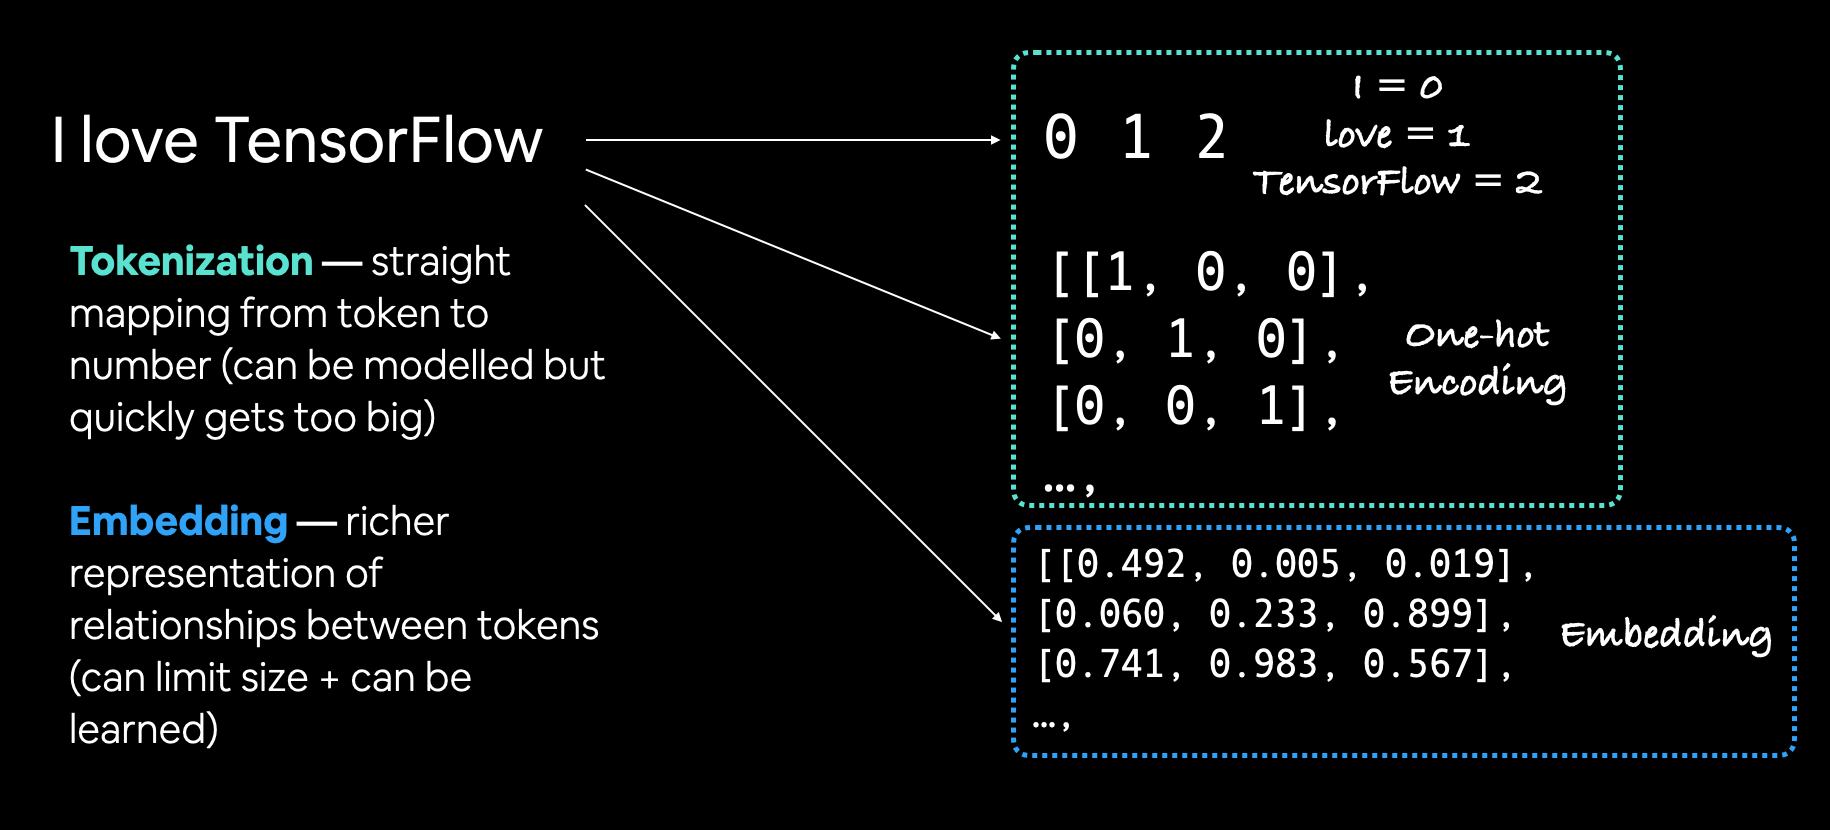

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-tokenization-vs-embedding.png"

# Resmi göster
display(Image(image_url))


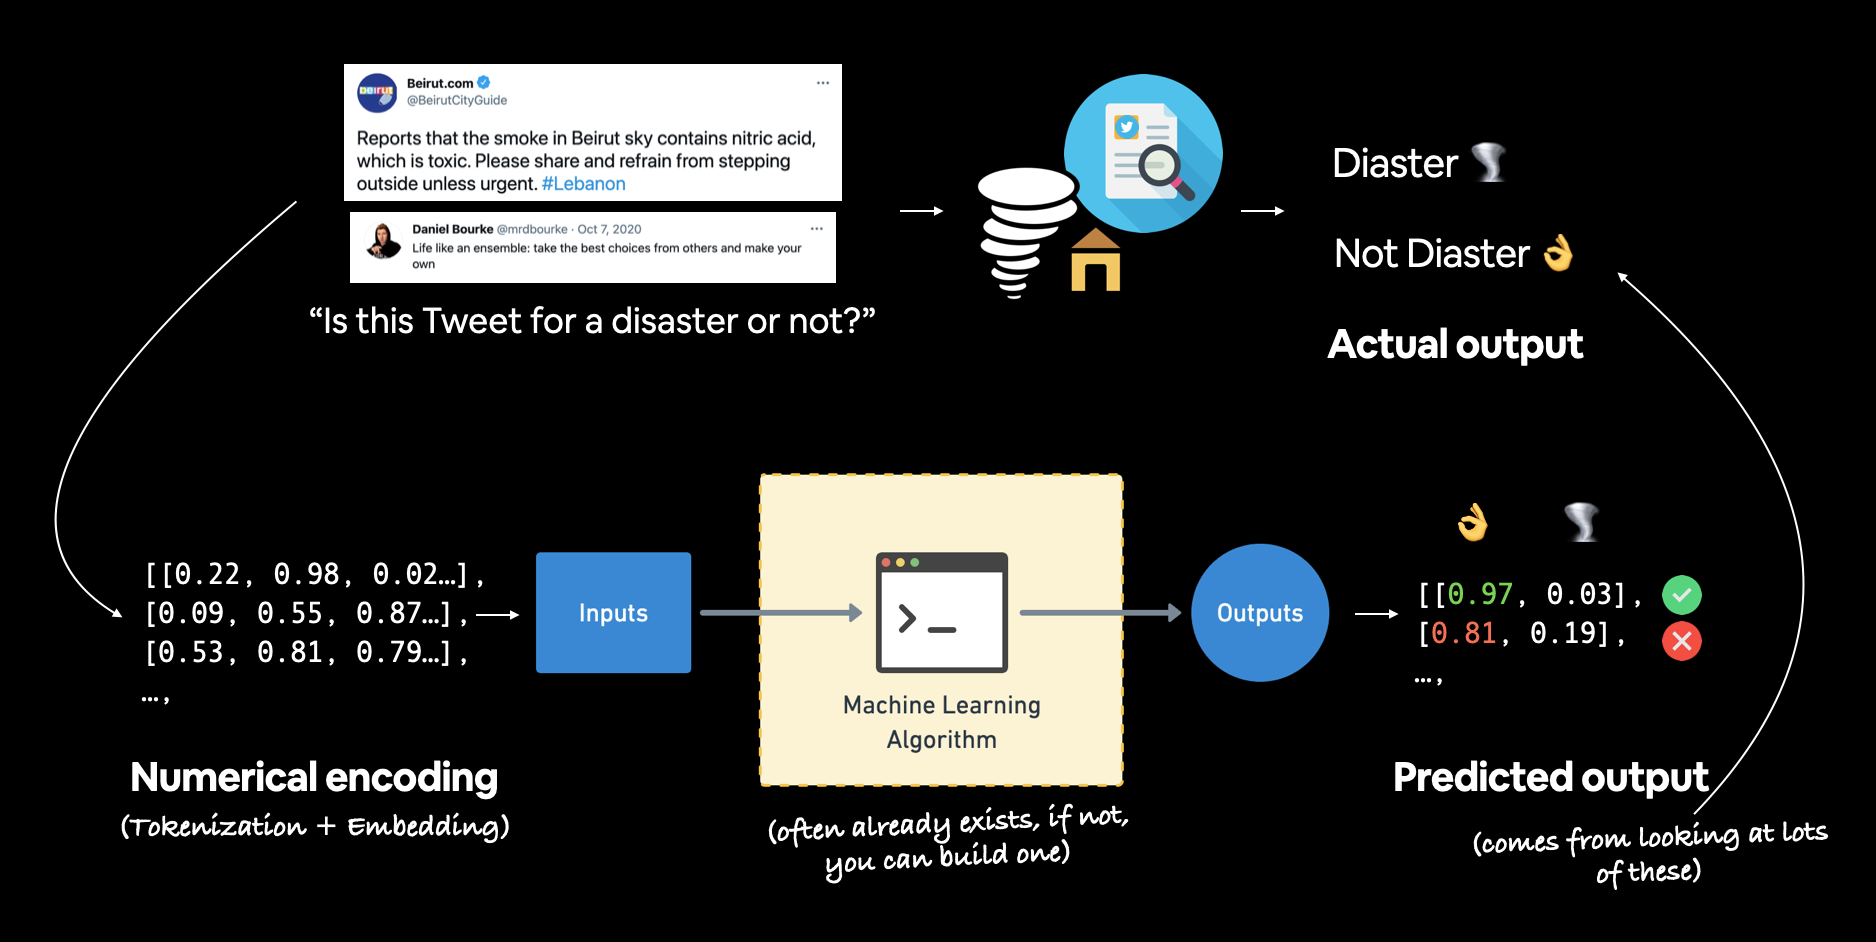

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-text-classification-inputs-and-outputs.png"

# Resmi göster
display(Image(image_url))


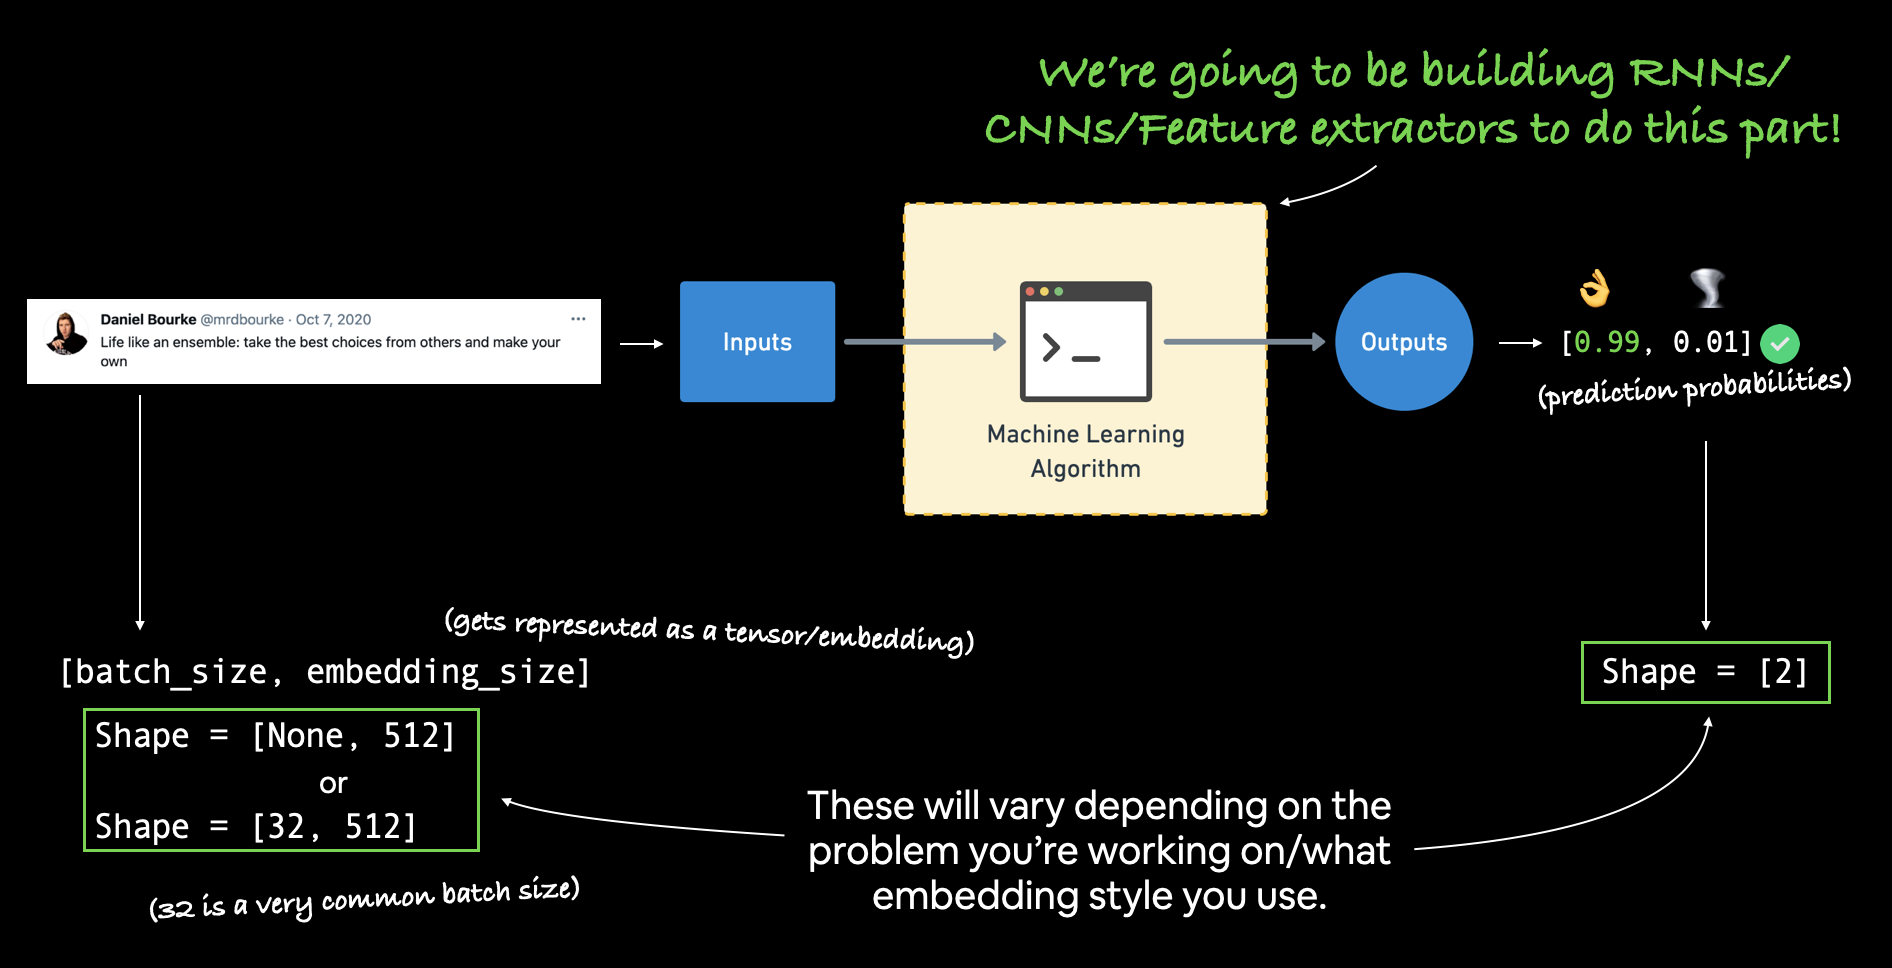

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-inputs-and-outputs-with-shapes-and-models-were-going-to-build.png"

# Resmi göster
display(Image(image_url))


# Bir metin veri kümesini görselleştirme

Çalışmak için yeni bir veri kümesi edindikten sonra, önce ne yapmalısınız?

Keşfet? İncele? Doğrula? Onunla bir olmak mı?

Hepsi doğru.

Sloganı hatırlayın: görselleştirin, görselleştirin, görselleştirin.

Şu anda metin veri örneklerimiz .csv dosyaları şeklindedir. Onları görsel hale getirmenin kolay bir yolu için, onları panda DataFrame'e dönüştürelim.

📖 Okuma: Birçok farklı formatta metin veri kümelerine rastlayabilirsiniz. CSV dosyalarının (birlikte çalıştığımız) yanı sıra, muhtemelen .txt dosyaları ve .json dosyalarıyla da karşılaşacaksınız. Bu tür dosyalarla çalışmak için RealPython'un aşağıdaki iki makalesini okumanızı tavsiye ederim:

https://realpython.com/read-write-files-python/

https://realpython.com/python-json/

Pandas verilerini içe aktarırsan bunun belleğe sığması gerekir. Colab ile 12.67 gb kullanıyorsun. Metin veri kümesi çok büyükse daha farklı yollar bulmalısın.

In [ ]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


İndirdiğimiz eğitim verileri muhtemelen zaten karıştırılmıştır. Ama emin olmak için, tekrar karıştıralım.

Frac ile verilerin yüzde kaçının alınacağı belirlenir. 0.1 ise %10

In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df_shuffled["text"][13]

'#Flood in Bago Myanmar #We arrived Bago'

Kaggle train ve test olarak verileri önceden böldü.

Eğitim verilerinin nasıl bir "hedel" sütununa sahip olduğuna dikkat edin.

"Hedef" sütununun değerini tahmin etmek için eğitim veri kümesinin "metin" sütununda kalıpları (örneğin farklı kelime kombinasyonları) bulmak için kod yazacağız.

Test veri kümesinin bir "hedel" sütunu yok.

Girişler (metin sütunu) -> Makine Öğrenimi Algoritması -> Çıktılar (hedef sütun)

In [ ]:
# The test data doesn't have a target (that's what we'd try to predict)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Her bir hedeften kaç örneğimiz olduğunu kontrol edelim.

In [ ]:
# How many examples of each class?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

İki hedef değerimiz olduğu için, ikili bir sınıflandırma sorunuyla uğraşıyoruz.

Oldukça dengeli de, yaklaşık %60 negatif sınıf (hedef = 0) ve %40 pozitif sınıf (hedef = 1).

Nerede,

* 1 = gerçek bir felaket Tweet

* 0 = gerçek bir felaket değil Tweet

Peki ya sahip olduğumuz toplam numune sayısı?

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


Pekala, makul miktarda eğitim ve test verimiz var gibi görünüyor. Bir şey olursa, çok sayıda test örneğimiz var, genellikle 90/10 (%90 eğitim, %10 test) veya 80/20'lik bir bölünme yeterlidir.

Tamam, görselleştirme zamanı, rastgele metin örneklerini görselleştirmek için biraz kod yazalım.

🤔 Soru: Neden rastgele örnekleri görselleştiriyorsunuz? Örnekleri sırayla görselleştirebilirsiniz, ancak bu yalnızca belirli bir veri alt kümesinin görülmesine yol açabilir. Çalıştığınız farklı veri türleri hakkında bir fikir edinmek için önemli miktarda (100+) rastgele örnek görselleştirmek daha iyidir. Makine öğreniminde, rastgeleliğin gücünü asla küçümsemeyin.

Rastfele sadece beş örnek görselleştirmesi -5

+5 O zaman rastgele indeksi rastgele indekse artı beşe almak istiyoruz.
Bu nedenle, bir veri çerçevesinde değerleri döndürmek için bir yöntem olan beş örnek noktayı demetlere alıyoruz.

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
and I thought my surgical wounds were healed!!! this weather ain't helping either ):

---

Target: 0 (not real disaster)
Text:
@jeannathomas not gonna lie.. I'm panicking a little bit. Vic/Hardy not there.. Freeman not practicing.

---

Target: 0 (not real disaster)
Text:
Damn Wale knows how to ruin a song??

---

Target: 1 (real disaster)
Text:
@BldrCOSheriff says 2nd grenade found is 'younger' that WWII era grenade found earlier. They'll detonate it at 8:00 tonight. @CBSDenver

---

Target: 0 (not real disaster)
Text:
@MisfitRarity misfit got bombed

---



Sadece sırayla yapıyorsanız, veri kümesini görselleştirirken rastgelelik çok önemlidir. Eğitim verilerimizi karıştırmamızın muhtemelen bir başka nedeni de bu. Verilerinizi tek tek, tek tek görüntülüyorsanız, biraz önyargılı olabilirsiniz.

# Verileri eğitim ve doğrulama setlerine ayırın

Test setinde etiket olmadığı ve eğitilmiş modellerimizi değerlendirmenin bir yoluna ihtiyacımız olduğundan, bazı eğitim verilerini böleceğiz ve bir doğrulama seti oluşturacağız.

Modelimiz eğitildiğinde (Tweet örneklerinde kalıpları denediğinde), yalnızca eğitim setinden gelen verileri görecek ve doğrulama setini kullanarak görünmeyen veriler üzerinde nasıl performans gösterdiğini görebiliriz.

Daha sonra kullanım kolaylığı için bölmelerimizi panda Serisi veri türlerinden dize listelerine (metin için) ve int listelerine (etiketler için) dönüştüreceğiz.

Eğitim veri kümemizi bölmek ve bir doğrulama veri kümesi oluşturmak için Scikit-Learn'in train_test_split() yöntemini kullanacağız ve eğitim örneklerinin %10'unu doğrulama setine ayıracağız.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

random_state kodunu yazmasaydın rastgele satır ve sütunlar seçerdi. Yine rastgele yapcak ama 42'ye sabitledik. Her defasında aynı veriler çıkacak. 42 yerine farklı bir rakam da olabilir.

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

len(train_df_shuffled) = 7613 = 6851 + 762

In [ ]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

array --> train labels.

# Metni sayılara dönüştürme

Harika! Bir eğitim setimiz ve Tweetler ve etiketler içeren bir doğrulama setimiz var.

Etiketlerimiz sayısal biçimdedir (0 ve 1) ancak Tweetlerimiz dize biçimindedir.

🤔 Soru: Metin verilerimizle bir makine öğrenimi algoritması kullanmadan önce ne yapmamız gerektiğini düşünüyorsunuz?

"Sayılara dönüştür" satırında bir şeye cevap verdiyseniz, haklısınız. Bir makine öğrenimi algoritması, girdilerinin sayısal biçimde olmasını gerektirir.

NLP'de metni sayılara dönüştürmek için iki ana kavram vardır:

* Tokenizasyon – Kelimeden, karakterden veya alt kelimeden sayısal bir değere doğrudan eşleme. Üç ana tokenizasyon seviyesi vardır:

  1. "I love TensorFlow" cümlesiyle kelime düzeyinde tokenizasyon kullanılması "I"nin 0, "love"un 1 ve "TensorFlow"un 2 olmasıyla sonuçlanabilir. Bu durumda dizideki her kelime tek bir token olarak kabul edilir.
  2. A-Z harflerini 1-26 değerlerine dönüştürmek gibi karakter düzeyinde tokenizasyon. Bu durumda dizideki her karakter tek bir simge olarak kabul edilir.
  3. Alt kelime tokenizasyonu, kelime düzeyinde ve karakter düzeyinde tokenizasyon arasındadır. Tek tek kelimeleri daha küçük parçalara ayırmayı ve daha sonra bu küçük parçaları sayılara dönüştürmeyi içerir. Örneğin, "en sevdiğim yemek ananaslı pizzadır", "benim, favorim, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za" olabilir. Bunu yaptıktan sonra bu alt kelimeler sayısal bir değerle eşleştirilecektir. Bu durumda her kelime birden fazla belirteç olarak düşünülebilir.

* Gömmeler - Gömme, öğrenilebilen doğal dilin bir temsilidir. Temsil bir özellik vektörü biçiminde gelir. Örneğin, "dance" kelimesi 5 boyutlu vektör [-0,8547, 0,4559, -0,3332, 0,9877, 0,1112] ile temsil edilebilir. Burada özellik vektörünün boyutunun ayarlanabileceğini belirtmek önemlidir. Gömmeleri kullanmanın iki yolu vardır:

  1. Kendi gömme işleminizi oluşturun - Metniniz sayılara dönüştürüldükten sonra (gömme için gereklidir), bunları bir gömme katmanına (tf.keras.layers.Embeddding gibi) yerleştirebilirsiniz ve bir gömme temsili, model eğitimi sırasında öğrenilecektir. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
  2. Önceden öğrenilmiş bir yerleştirmeyi yeniden kullanın - Önceden eğitilmiş birçok yerleştirme çevrimiçi olarak mevcuttur. Bu önceden eğitilmiş yerleştirmeler genellikle büyük metin yığınları (örneğin, Wikipedia'nın tamamı) üzerinde öğrenilmiştir ve bu nedenle doğal dilin iyi bir temel temsiline sahiptir. Modelinizi başlatmak ve kendi özel görevinize göre ince ayar yapmak için önceden eğitilmiş bir yerleştirme kullanabilirsiniz.

  Belirteçleştirme örneği (kelimeden sayıya düz eşleme) ve gömme (belirteçler arasındaki ilişkilerin daha zengin temsili).

🤔 Soru: Hangi düzeyde tokenzation kullanmalıyım? Hangi gömmeyi seçmeliyim?

Sorununuza bağlı. Karakter düzeyinde belirteçleştirmeyi/gömmeleri ve kelime düzeyinde belirteçleştirmeyi/gömmeyi deneyebilir ve hangisinin en iyi performansı gösterdiğini görebilirsiniz. Hatta onları istiflemeyi denemek isteyebilirsiniz (örneğin, tf.keras.layers.concatenate kullanarak gömme katmanlarınızın çıktılarını birleştirmek). https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate

Önceden eğitilmiş kelime gömmeleri, Word2vec gömmeleri, GloVe gömmeleri ve TensorFlow Hub'da bulunan seçeneklerin çoğu, başlamak için harika yerlerdir.

🔑 Not: Önceden eğitilmiş bir bilgisayar görme modeli aramak gibi, sorununuz için kullanmak üzere önceden eğitilmiş kelime gömmelerini de arayabilirsiniz. "TensorFlow'da önceden eğitilmiş kelime gömmelerini kullan" gibi bir şey aramayı deneyin.

* http://jalammar.github.io/illustrated-word2vec/
* https://nlp.stanford.edu/projects/glove/
* https://www.kaggle.com/models?query=text-embedding&tfhub-redirect=true

Embeddings --> Her bir token için özellik vektör matrisidir. Ağırlık matrisidir böylece sinir ağında bir katman haline gelir ve öğrenebilir.

Tokenization --> Bir metin küçük parçalara bölünür ve buna token denir. Bir kelime veya harf olabilir.

# Metin vektörleştirme (tokenizasyon)

Yeterince tokenizasyon ve gömme hakkında konuşalım, hadi biraz yapalım.

Önce belirteç alıştırması yapacağız (kelimelerimizi sayılarla eşleme).

Kelimelerimizi belirtmek için yararlı ön işleme katmanı tf.keras.layers.experimental.preprocessing.TextVectorization'ı kullanacağız.

TextVectorization katmanı aşağıdaki parametreleri alır:

* Max_tokens - Kelime dağarcığınızdaki maksimum kelime sayısı (örneğin 20000 veya metninizdeki benzersiz kelime sayısı), OOV (kelime dağarcığı dışında) belirteçleri için bir değer içerir.

* Standardize - Metni standartlaştırma yöntemi. Varsayılan, metni düşüren ve tüm noktalama işaretlerini kaldıran "lower_and_strip_punctuation" dır.

* Bölme - Metin nasıl bölünür, varsayılan boşluklarda bölünen "beyaz boşluk" dır.

* Ngrams - Belirteç bölmesi başına kaç kelime içereceği, örneğin, ngrams=2 belirteçleri 2'nin sürekli dizilerine böler.

* Output_mode - Belirteçler nasıl çıkarılır, "int" (tamsayı eşleme), "ikili" (bir-sıcak kodlama), "count" veya "tf-idf" olabilir. Daha fazla bilgi için belgelere bakın.

* Output_sequence_length - Çıktıya belirtilmiş dizinin uzunluğu. Örneğin, output_sequence_length=150 ise, tüm belirteçli diziler 150 belirteç uzunluğunda olacaktır.

* Pad_to_max_tokens - Varsayılan olarak False, True ise, kelime dağarcığındaki benzersiz belirteçlerin sayısı max_tokens'ten az olsa bile çıkış özellik ekseni max_tokens'a doldurulacaktır. Yalnızca belirli modlarda geçerlidir, daha fazlası için belgelere bakın.

Bunu iş başında görelim.

max_token None ise kelime dağarcığında bir sınırlama yoktur. 10.000 deseydik en yaygın on bin kelimeyi seçerdi. Bir kelime bu on binde olmayabilir.

Split için default haline whitespace.

ngrams 2 olarak ayarlarsan iki kelimeden oluşan bir grup oluşur.

output_mode alabileceği değerler int, binary, count, tf-idf

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

Varsayılan ayarlarla bir TextVectorization nesnesini başlattık, ancak kendi kullanım durumumuz için biraz özelleştirelim.

Özellikle, max_tokens ve output_sequence_length için değerler ayarlayalım.

Max_tokens (kelime dağarcığındaki kelime sayısı) için, 10.000'in (10.000, 20.000, 30.000) katları veya metninizdeki benzersiz kelimelerin tam sayısı (örneğin 32.179) ortak değerlerdir.

Kullanım durumumuz için 10.000 kullanacağız.

Ve output_sequence_length için, eğitim setinde Tweet başına ortalama belirteç sayısını kullanacağız. Ama önce onu bulmamız gerekecek.

Eğitim tweet'indeki max uzunluğu ortalama token uzunluğu olarak ayarlarız.

train_sendences[0].split() ---> bir tweet.

len(...) ---> o tweetin uzunluğunu verir.

tweetlerdeki her bir cümlenin uzunluğunu toplamak için ---> round(sum([len(i.split()) for i in train_sentences]) = 102087

Aşağıda bulunan 15 ile her bir tweette ortalama 15 token (kelime) var.

In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

Şimdi özel parametrelerimizi kullanarak başka bir TextVectorization nesnesi oluşturalım.

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

TextVectorization örneğimizi text_vectorizer'ı verilerimizle eşlemek için, test veya doğrulama verilerinden değil eğitim metnimizi geçirirken üzerindeki adapt() yöntemini çağırabiliriz.

adapt --> ön işlenmiş katmanın durumunu datasetine yerleştirir.

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

Eğitim verileri eşlendi! Özel bir cümle üzerinde text_vectorizer'ımızı deneyelim (eğitim verilerinde görebileceğinize benzer).

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Harika, metnimizi sayılara dönüştürmenin bir yolu var gibi görünüyor (bu durumda, kelime düzeyinde belirteç). Döndürülen tensörün sonundaki 0'lara dikkat edin, bunun nedeni output_sequence_length=15'i ayarlamamızdır, yani text_vectorizer'a geçirdiğimiz dizinin boyutu ne olursa olsun, her zaman 15 uzunluğunda bir dizi döndürür.

Birkaç rastgele cümlede text_vectorizer'ımızı denemeye ne dersin?

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
My dad is panicking as my weight loss means he needs to hurry up with my new clothes fundwhen I reach my goal.  ??      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13, 1419,    9,  535,   26,   13, 3252, 1818, 1192,   56,  840,
           5, 3758,   27,   14]])>

Son olarak, get_vocabulary() yöntemini kullanarak kelime dağarcığımızdaki benzersiz belirteçleri kontrol edebiliriz.

words_in_vocab --> eğitim verilerindeki tüm benzersiz kelimeleri almak içindir.

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# Bir Gömme Katmanı kullanarak bir Gömme Oluşturma

Metnimizi sayılarla eşlemenin bir yolu var. Bir adım daha ileri gidip bu sayıları bir gömmeye dönüştürmeye ne dersiniz?

Bir gömme ile ilgili güçlü olan şey, eğitim sırasında öğrenilebilmesidir. Bu sadece statik olmaktan ziyade anlamına gelir (örn. 1 = I, 2 = aşk, 3 = TensorFlow), bir model veri örneklerinden geçerken bir kelimenin sayısal temsili geliştirilebilir.

tf.keras.layers.Embedding katmanını kullanarak bir kelimenin gömülmesinin nasıl göründüğünü görebiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

Burada endişelendiğimiz ana parametreler şunlardır:

* Input_dim - Kelime dağarcığının boyutu (örn. len(text_vectorizer.get_vocabulary()).

* Output_dim - Çıktı gömme vektörünün boyutu, örneğin, 100 çıktı değeri, her kelime için 100 boyutunda bir özellik vektörüdür.

* Embeddings_initializer - Gömme matrisi nasıl başlatılır, varsayılan, gömme matrisini tek tip dağılımla rastgele başlatan "üniform" dır. Bu, önceden öğrenilmiş gömmeleri kullanmak için değiştirilebilir.

* Input_length - Gömme katmanına geçirilen dizilerin uzunluğu.

Bunları bilerek, bir gömme katmanı yapalım.

tf.keras.layers.Embedding --> pozitif tam sayıları (indeksleri) düzeltilmiş ölçünün yoğun vektörlerine dönüştürür. Yoğun vektör sıfırdan küçük sayıların olduğu matris. Rastgele sayılardır çünkü modelin birinde bir katman kelime sırasına veya temsiline iyi uyacak şekilde güncellenir.

8'e bölünebilen sayılar tercih et. Daha hızlı hesaplama için.

uniform...rastgele tek tik sayılar anlamına gelen başlangıç

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

Mükemmel, bir TensoFlow katmanının nasıl gömüldüğüne dikkat edin? Bu önemlidir, çünkü onu bir modelin parçası olarak kullanabiliriz, yani parametreleri (kelime temsilleri) model öğrendikçe güncellenebilir ve geliştirilebilir.

Örnek bir cümle üzerinde denemeye ne dersin?

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
@LibertarianLuke I'm all for that to be honest. If people want to go on a rampage let them use their own hands and feet. No casualties.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01479646, -0.03483726,  0.01362639, ...,  0.03526468,
         -0.01854018,  0.0236136 ],
        [-0.02734429,  0.04695444,  0.00695603, ...,  0.00426426,
          0.0477266 ,  0.04976663],
        [ 0.02163247, -0.01251234, -0.00830332, ...,  0.02905008,
          0.02512353,  0.01121   ],
        ...,
        [-0.0390741 ,  0.01423272,  0.03825709, ..., -0.03781395,
         -0.01106111, -0.04794364],
        [-0.01625657, -0.00938426,  0.02279463, ..., -0.0142154 ,
          0.02683384,  0.02006409],
        [ 0.03155584, -0.031823  , -0.00649806, ...,  0.00231277,
          0.01392496,  0.01352951]]], dtype=float32)>

Cümledeki her belirteç, 128 uzunlukta bir özellik vektörüne dönüştürülür.

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01479646, -0.03483726,  0.01362639, -0.04143757, -0.03739432,
        0.0488778 , -0.03417448, -0.00581576, -0.02940813,  0.00225549,
        0.04254872,  0.03058697, -0.02397835,  0.03380616,  0.03097624,
       -0.04629846, -0.01445685,  0.02256738,  0.02032358,  0.03464582,
        0.04984398, -0.03299014, -0.00727148,  0.00053363,  0.00480875,
        0.04477025, -0.02267758,  0.02332865,  0.0190335 ,  0.03103993,
        0.01422806, -0.0474951 ,  0.03727934,  0.04871484,  0.00494478,
        0.0398871 , -0.01169037, -0.00295445, -0.00106585,  0.00239074,
       -0.02519503, -0.03890715, -0.01612189, -0.02225425,  0.04542557,
       -0.01750695,  0.04765458,  0.02671111,  0.03182337,  0.00767028,
       -0.01376325, -0.04847546,  0.03664701, -0.03858235,  0.01258813,
       -0.04970929, -0.01792872,  0.02766215, -0.02291849, -0.04506638,
       -0.02668884,  0.02619794,  0.04728459, -0.00331808,  0.04447239,
       -0.042700

Bu değerler bizim için pek bir şey ifade etmeyebilir, ancak bilgisayarımızın her kelimeyi gördüğü şeydir. Modelimiz farklı örneklerde kalıplar aradığında, bu değerler gerektiği şekilde güncellenecektir.

🔑 Not: Önceki iki kavram (tokenizasyon ve gömmeler) birçok NLP görevinin temelidir. Bu nedenle, herhangi bir şeyden emin değilseniz, anlayışınıza daha fazla yardımcı olmak için araştırma yaptığınızdan ve kendi deneylerinizi yürüttüğünüzden emin olun.

# Bir metin veri kümesini modelleme

Girişlerinizi ve çıkışlarınızı hazırladıktan sonra, boşluğu kapatmak için aralarında hangi makine öğrenimi modelinin oluşturulacağını bulma meselesidir.

Artık metin verilerimizi sayılara dönüştürmenin bir yoluna sahip olduğumuza göre, onu modellemek için makine öğrenimi modelleri oluşturmaya başlayabiliriz.

Bolca pratik yapmak için, her biri kendi deneyi olarak bir dizi farklı model oluşturacağız. Daha sonra her modelin sonuçlarını karşılaştıracağız ve hangisinin en iyi performansı gösterdiğini göreceğiz.

Daha spesifik olarak, aşağıdakileri inşa edeceğiz:

* Model 0: Naif Bayes (taban çizgisi)

* Model 1: İleri besleme sinir ağı (yoğun model)

* Model 2: LSTM modeli

* Model 3: GRU modeli

* Model 4: Çift yönlü-LSTM modeli

* Model 5: 1D Evrişimli Sinir Ağı

* Model 6: TensorFlow Hub Önceden Eğitilmiş Özellik Çıkarıcı

* Model 7: Eğitim verilerinin %10'u ile model 6 ile aynı

Model 0, diğer daha derin modellerin birbirini yenmesini beklediğimiz bir taban çizgisi elde etmek için en basit olanıdır.

Her deney aşağıdaki adımlardan geçecektir:

* Modeli oluştur

* Modeli eğitin

* Modelle tahminlerde bulunun

* Daha sonraki karşılaştırma için tahmin değerlendirme metriklerini takip edin

Başlayalım.

# Model 0: Temel alma

Tüm makine öğrenimi modelleme deneylerinde olduğu gibi, temel bir model oluşturmak önemlidir, böylece üzerine inşa edilecek gelecekteki deneyler için bir ölçüte sahipsiniz.

Temel çizgimizi oluşturmak için, kelimelerimizi sayılara dönüştürmek için TF-IDF (terim frekansı-ters belge frekansı) formülünü kullanarak bir Scikit-Learn Boru Hattı oluşturacağız ve ardından bunları Multinomial Naive Bayes algoritması ile modelleyeceğiz. Bu, Scikit-Learn makine öğrenimi haritasına atıfta bulunularak seçildi.

📖 Okuma: TF-IDF algoritmasının giriş ve çıkışları bu not defterinin kapsamı dışındadır, ancak meraklı okuyucunun daha fazla bilgi için Scikit-Learn belgelerine göz atması teşvik edilir.

* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

Multinomial Naive Bayes gibi sığ bir model kullanmanın yararı, eğitimin çok hızlı olmasıdır.

Modelimizi değerlendirelim ve temel metriğimizi bulalım.

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


Temel modelimizle bazı tahminlerde bulunmaya ne dersiniz?

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# Model deneylerimiz için bir değerlendirme fonksiyonu oluşturma

Bunları olduğu gibi değerlendirebiliriz, ancak ileriye dönük olarak birkaç modeli aynı şekilde değerlendireceğimiz için, bir dizi tahmin ve temel doğruluk etiketi alan ve aşağıdakileri hesaplayan bir yardımcı işlev oluşturalım:

- Accuracy

- Precision

- Recall

- F1-score

🔑 Not: Bir sınıflandırma sorunuyla uğraştığımız için yukarıdaki metrikler en uygun olanlardır. Bir regresyon problemi ile çalışıyor olsaydık, MAE (ortalama mutlak hata) gibi diğer metrikler daha iyi bir seçim olurdu.

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

Aynı fonks. tekrar tekrar yazmak yerine bunu helper func alanına github'da yazıp içe aktarabilirsin.

# Model 1: Basit bir yoğun model

Oluşturacağımız ilk "derin" model, tek katmanlı yoğun bir modeldir. Aslında, zar zor tek bir katmana sahip olacak.

Metnimizi ve etiketlerimizi girdi olarak alacak, metni tokenize edecek, bir gömme oluşturacak, gömmenin ortalamasını bulacak (Küresel Ortalama Havuzlama kullanarak - GlobalAveragePooling) ve ardından ortalamayı bir çıkış birimi ve bir sigmoid aktivasyon işlevi ile tamamen bağlı bir katmandan geçirecektir.

Önceki cümle bir ağız dolusu gibi geliyorsa, kodladığımızda mantıklı olacaktır (unutmayın, şüpheniz varsa, kodlayın).

Ve bir dizi TensorFlow derin öğrenme modeli oluşturacağımız için, her birinin sonuçlarını takip etmek için create_tensorboard_callback() işlevimizi helper_functions.py'den içe aktaracağız.

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

Şimdi hazır bir TensorBoard geri arama işlevimiz var, hadi ilk derin modelimizi oluşturalım.

x = embedding(x) --> inputs sayılara dönüşür ve ardından embedding'e dönüşür.

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

İyi görünüyor. Modelimiz girdi olarak 1 boyutlu bir dize alır (bizim durumumuzda bir Tweet), daha sonra text_vectorizer kullanarak dizeyi tokenize eder ve gömme kullanarak bir gömme oluşturur.

Daha sonra (isteğe bağlı olarak) çıkış katmanına geçirdiğimiz tensörün boyutsallığını azaltmak için gömme katmanının çıktılarını bir araya getiriyoruz.

🛠Alıştırma: Gömme katmanından sonra GlobalAveragePooling1D() katmanı ile ve katmansız model_1 oluşturmayı deneyin. Ne olur? Bunun neden olduğunu düşünüyorsun?

Son olarak, havuzlama katmanının çıktısını sigmoid aktivasyonlu yoğun bir katmana geçiriyoruz (sorunumuz ikili sınıflandırma olduğu için sigmoid kullanıyoruz).

Modelimizi verilere sığdırmadan önce, onu derlememiz gerekiyor. İkili sınıflandırma ile çalıştığımız için, kayıp fonksiyonumuz ve Adam optimize edici olarak "binary_crossentropy" kullanacağız.

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

Eğitilebilir parametrelerin çoğu gömme katmanı içinde bulunur. 10.000 (input_dim=10000) büyüklüğünde bir kelime dağarcığı için 128 (output_dim=128) boyutunda bir gömme oluşturduk, dolayısıyla 1.280.000 eğitilebilir parametre.

Pekala, modelimiz derlendi, 5 dönem için eğitim verilerimize sığdıralım. Modelimizin eğitim metriklerinin günlüğe kaydedildiğinden emin olmak için TensorBoard geri arama işlevimizi de geçeceğiz.

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240505-201617
Epoch 1/5
215/215 [==============================] - 9s 33ms/step - loss: 0.6113 - accuracy: 0.6923 - val_loss: 0.5377 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4429 - accuracy: 0.8189 - val_loss: 0.4695 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3477 - accuracy: 0.8593 - val_loss: 0.4589 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2861 - accuracy: 0.8917 - val_loss: 0.4636 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2392 - accuracy: 0.9123 - val_loss: 0.4759 - val_accuracy: 0.7861


Güzel! Bu kadar basit bir model kullandığımız için her çağ çok hızlı işliyor.

Doğrulama setinde modelimizin performansını kontrol edelim.

In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7861


[0.47587546706199646, 0.7860892415046692]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.00142858, -0.06139635, -0.02504604, ...,  0.06418189,
         -0.06345183,  0.01718242],
        [-0.01790898, -0.03836795,  0.01412967, ...,  0.03798354,
         -0.02074611,  0.0225098 ],
        [-0.00113335, -0.04520319,  0.04438212, ...,  0.04663613,
         -0.02363119,  0.0119195 ],
        ...,
        [-0.03132727, -0.01312103, -0.03101199, ...,  0.02967476,
          0.04545164, -0.03944175],
        [-0.05388743,  0.0057177 ,  0.05462888, ...,  0.00966645,
         -0.08947212, -0.01296549],
        [-0.1129536 , -0.07841606,  0.09156901, ...,  0.07077377,
         -0.05151029, -0.09437992]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


Ve modelimizin eğitim günlüklerini TensorBoard ile takip ettiğimize göre, onları görselleştirmeye ne dersiniz?

TensorBoard günlük dosyalarımızı (model_logs dizininde bulunan) TensorBoard.dev'e yükleyerek bunu yapabiliriz.

🔑 Not: Unutmayın, TensorBoard.dev'e yüklediğiniz her şey herkese açık hale gelir. Paylaşmak istemediğiniz eğitim günlükleri varsa, bunları yüklemeyin.

In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # exits the uploader when upload has finished

In [ ]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

The TensorBoard.dev experiment for our first deep model can be viewed here: https://tensorboard.dev/experiment/5d1Xm10aT6m6MgyW3HAGfw/

Modelimizin antrenman eğrileri TensorBoard'da nasıl görünüyor. Eğrilere bakarak modelin aşırı mı yoksa az mı oturduğunu anlayabilir misiniz?

Güzel! Bunlar bazı renkli eğitim eğrileri. Modelin aşırı oturduğunu veya az oturduğunu söyleyebilir misiniz?

İlk derin modelimizi oluşturduk ve eğittik, bir sonraki adım onunla bazı tahminlerde bulunmaktır.

In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 2ms/step


array([[0.40130943],
       [0.74405336],
       [0.9978047 ],
       [0.10763668],
       [0.113638  ],
       [0.93502265],
       [0.91724616],
       [0.9930118 ],
       [0.9703334 ],
       [0.26253682]], dtype=float32)

Son katmanımız bir sigmoid aktivasyon işlevi kullandığından, tahminlerimizi olasılıklar şeklinde geri alıyoruz.

Bunları tahmin sınıflarına dönüştürmek için tf.round() kullanacağız, yani 0.5'in altındaki tahmin olasılıkları 0'a yuvarlanacak ve 0.5'in üzerindekiler 1'e yuvarlanacak.

🔑 Not: Uygulamada, bir sigmoid tahmin olasılığının çıktı eşiği mutlaka 0,5 olmak zorunda değildir. Örneğin, test yoluyla, seçtiğiniz değerlendirme metrikleri için 0.25'lik bir kesintinin daha iyi olduğunu görebilirsiniz. Bu eşik sınırının yaygın bir örneği, hassas geri çağrılan takasıdır (fenomen hakkında bilgi edinmek için "takas" anahtar kelimesini arayın).

https://en.wikipedia.org/wiki/Precision_and_recall#Introduction

In [ ]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

Şimdi modelimizin tahminlerini sınıflar şeklinde aldık, bunları temel doğruluk doğrulama etiketleriyle karşılaştırmak için calculate_results() işlevimizi kullanabiliriz.

In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

İlk derin modelimizi temel modelimizle karşılaştırmaya ne dersiniz?

In [ ]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

Bu tür bir karşılaştırmayı (yeni modele kıyasla temel) birkaç kez yapacağımıza göre, bize yardımcı olacak bir işlev oluşturalım.

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


# Öğrenilmiş gömmeleri görselleştirme

İlk modelimiz (model_1), eğitim verilerini geçerek kelimeleri özellik vektörleri olarak temsil etmenin bir yolunu öğrenen bir gömme katmanı (gömme) içeriyordu.

Bunu ilk birkaç kez duymak kafa karıştırıcı gelebilir.

Bu nedenle, bir metin gömmenin ne olduğunu anlamaya daha fazla yardımcı olmak için, modelimizin öğrendiği gömmeyi görselleştirelim.

Bunu yapmak için, kelime dağarcığımızdaki kelimeleri kendimize hatırlatalım.

Modeldeki gömme katmanı kendi iç ağırlıkları veya iç yoğunluk vektörlerini günceller. Her bir tokenin ne olması gerektiğine dair bir temsili var.

Aşağıda en yaygın on kelime listelendi.

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

Ve şimdi gömme katmanımızın ağırlıklarını alalım (bunlar her kelimenin sayısal temsilleridir).

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

(10000,128) --> Yerleştirme matrisi, Her token 128 boyutlu bir vektör.

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


Şimdi bu iki nesnemiz var, gömmemizi görselleştirmek için Gömme Projektör aracını kullanabiliriz.

Projektör Gömme aracını kullanmak için iki dosyaya ihtiyacımız var:

1. Gömme vektörleri (gömme ağırlıkları ile aynı).

2. Gömme vektörlerinin meta verileri (temsil ettikleri kelimeler - kelime dağarcığımız).

Şu anda, Python nesneleri olarak bu dosyalara sahipiz. Bunları dosyaya indirmek için TensorFlow kelime gömme öğretici sayfasında bulunan kod örneğini kullanacağız.

https://www.tensorflow.org/text/guide/word_embeddings?hl=tr#retrieve_the_trained_word_embeddings_and_save_them_to_disk

In [ ]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0:
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

Gömme vektörlerini ve meta verileri indirdikten sonra, Gömme Vektör aracını kullanarak bunları görselleştirebilirsiniz:

1. http://projector.tensorflow.org/ adresine gidin

2. "Verileri yükle"ye tıklayın

3. İndirdiğiniz iki dosyayı yükleyin (embedding_vectors.tsv ve embedding_metadata.tsv)

4. Keşfetmek

5. İsteğe bağlı: "Yayınla"ya tıklayarak oluşturduğunuz verileri paylaşabilirsiniz

Ne buluyorsun?

Benzer anlamlara sahip kelimeler birbirine yakın mı?

Unutma, olmayabilirler. İndirdiğimiz gömmeler, modelimizin kelimeleri nasıl yorumladığıdır, bizim onları nasıl yorumladığımız değil.

Ayrıca, gömme tamamen Tweetlerden öğrenildiği için, Tweet'ler çok benzersiz bir doğal dil tarzı olduğu için bazı garip değerler içerebilir.

🤔 Soru: Her seferinde gömmeleri görselleştirmek zorunda mısınız?

Hayır. Doğal dil yerleştirmelerinin ne olduğuna dair bir sezgi kazanmak için yararlı olsa da, tamamen gerekli değildir. Özellikle kelime dağarcığınızın ve gömmelerinizin boyutları büyüdükçe, onları anlamaya çalışmak giderek daha zor bir görev haline gelecektir.

# Tekrarlayan Sinir Ağları (RNN'ler)

Bir sonraki modelleme deneyleri serimiz için, Tekrarlayan Sinir Ağı (RNN) adı verilen özel bir sinir ağı türü kullanacağız.

Bir RNN'nin öncülü basittir: gelecek konusunda size yardımcı olmak için geçmişten gelen bilgileri kullanın (tekrarlayan terimin geldiği yer burasıdır). Başka bir deyişle, bir giriş (X) alın ve önceki tüm girdilere dayalı olarak bir çıktı (y) hesaplayın.

Bu kavram, özellikle doğal dil metninin pasajları (Tweetlerimiz gibi) gibi dizilerle uğraşırken yararlıdır.

Örneğin, bu cümleyi okuduğunuzda, mevcut kelime köpeğinin anlamını deşifre ederken önceki kelimeleri bağlama sokarsınız.

Orada ne olduğunu gördünüz mü?

Geçerli bir kelime olan "köpek" kelimesini sonuna koydum ama cümlenin geri kalanı bağlamında bir anlam ifade etmiyor.

Bir RNN bir metin dizisine (zaten sayısal biçimde) baktığında, öğrendiği kalıplar dizinin sırasına göre sürekli olarak güncellenir.

Basit bir örnek için iki cümle alın:

1. Geçen hafta büyük deprem, değil mi?

2. Geçen hafta büyük bir deprem olmadı.

Her ikisi de tam olarak aynı kelimeleri içerir ancak farklı anlamlara sahiptir. Kelimelerin sırası anlamı belirler (noktalama işaretlerinin de anlamı belirlediği tartışılabilir, ancak basitlik uğruna, kelimelere odaklanalım).

Tekrarlayan sinir ağları bir dizi dizi tabanlı problem için kullanılabilir:

* Bire bir: bir giriş, bir çıkış, örneğin görüntü sınıflandırması.

* Bire çok: bir giriş, görüntü başlığı gibi birçok çıktı (görüntü girişi, altyazı çıkışı olarak bir metin dizisi).

* Bire çok: birçok girdi, metin sınıflandırması gibi bir çıktı (bir Tweet'i gerçek diaster olarak sınıflandırmak veya gerçek diaster olarak sınıflandırmamak).

* Çoktan çoka: birçok girdi, makine çevirisi (İngilizce'den İspanyolca'ya çeviri) veya konuşmadan metne (giriş olarak ses dalgası, çıktı olarak metin) gibi birçok çıktı.

Vahşi doğada RNN'lerle karşılaştığınızda, büyük olasılıkla aşağıdakilerin varyantlarıyla karşılaşacaksınız:

1. Uzun kısa süreli hafıza hücreleri (LSTM'ler).

2. Kapılı tekrarlayan birimler (GRU'lar).

3. Çift yönlü RNN'ler (soldan sağa ve sağdan sola bir dizi boyunca ileri ve geri geçer).

Bunların her birinin ayrıntılarına girmek bu not defterinin kapsamı dışındadır (bunun yerine onları kullanmaya odaklanacağız), şimdilik bilmeniz gereken en önemli şey, dizileri modellemede çok etkili olduklarını kanıtladıklarıdır.

Yazmak üzere olduğumuz kodun perde arkasında neler olup bittiğini daha iyi anlamak için aşağıdaki kaynakları tavsiye ederim:



📖 Kaynaklar:

MIT Tekrarlayan Sinir Ağları Üzerine Derin Öğrenme Konferansı - tekrarlayan sinir ağlarının arka planını açıklar ve LSTM'leri tanıtır. https://www.youtube.com/watch?v=SEnXr6v2ifU&feature=youtu.be

Andrej Karpathy'nin Tekrarlayan Sinir Ağlarının Mantıksız Etkinliği - çeşitli diziler üreten örneklerle RNN'lerin gücünü göstermektedir. http://karpathy.github.io/2015/05/21/rnn-effectiveness/

Chris Olah'ın LSTM'lerini anlamak - muhtemelen en popüler RNN yapı taşı olan LSTM hücresinin mekaniğine derinlemesine (ve teknik) bir bakış. https://colah.github.io/posts/2015-08-Understanding-LSTMs/

# Model 2: LSTM

RNN'lerin ne olduğu ve ne için iyi oldukları hakkında tüm bu konuşmalarla, bir tane inşa etmeye istekli olduğunuzdan eminim.

LSTM destekli bir RNN ile başlayacağız.

TensorFlow'da LSTM hücresinin gücünden yararlanmak için (LSTM hücresi ve LSTM katmanı genellikle birbirinin yerine kullanılır), tensorflow.keras.layers.LSTM() kullanacağız.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

Modelimiz model_1'e çok benzer bir yapı üstlenecek:

Giriş (metin) -> Tokenize -> Gömme -> Katmanlar -> Çıktı (etiket olasılığı)

Temel fark, gömme ve çıktımız arasına bir LSTM katmanı eklememiz olacaktır.

Ve eğitimli gömmeleri yeniden kullanmadığımızdan emin olmak için (bu, modeller arasında veri sızıntısını içerecektir ve daha sonra düzensiz bir karşılaştırmaya yol açar), modelimiz için başka bir gömme katmanı (model_2_embedding) oluşturacağız. Eğitim sırasında güncellenmediği için text_vectorizer katmanı yeniden kullanılabilir.

🔑 Not: Her model için yeni bir gömme katmanı kullanmamızın nedeni, gömme katmanının kelimelerin (sayılar olarak) öğrenilmiş bir temsili olmasıdır, her model için aynı gömme katmanını (embedding_1) kullanacak olsaydık, bir modelin öğrendiklerini bir sonrakiyle karıştırırdık. Ve modellerimizi daha sonra karşılaştırmak istediğimiz için, onları her seferinde kendi gömme katmanlarıyla başlatmak daha iyi bir fikirdir.

Long short term memory



In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


(none,15,128)'lik bir şekil vardı. Bu gömme girdisini tekrarlayan bir katmana iletiriz. İlk tekrarlayan katmandır. Tekrarlayan bir katmanın öncülü, yardımcı olmak için önceki bir girdinin temsilini kullanmaktır, daha sonraki bir girdinin temsili.

İlk sequence kodunu yoruma almasaydın sonuç (none, 15, 64) olurdu. Dönüş dizini True.

Giriş katmanı 3 boyutlu olmalı. None --> batch_size, 15 -->token, 128 --> feature_vector.



🔑 Not: TensorFlow LSTM katmanının belgelerini okuyarak çok sayıda parametre bulacaksınız. Bunların çoğu, mümkün olduğunca hızlı hesapladıklarından emin olmak için ayarlanmıştır. Ayarlamak isteyeceğiniz ana birimler (gizli birimlerin sayısı) ve return_sequences'tır (LSTM veya diğer tekrarlayan katmanları istiflerken bunu True olarak ayarlayın).

Şimdi LSTM modelimizi oluşturduk, "binary_crossentropy" kaybını ve Adam optimize ediciyi kullanarak derleyelim.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Ve modelimizi verilere sığdırmadan önce bir özet alalım.

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

İyi görünüyor! LSTM katmanımızda model_1'den birkaç daha eğitilebilir parametre fark edeceksiniz.

Bu sayının nereden geldiğini bilmek isterseniz, bir LSTM hücresindeki parametre sayısını hesaplamak için yukarıdaki kaynakları ve aşağıdakileri gözden geçirmenizi öneririm:

- Marcin Możejko tarafından bir LSTM hücresindeki parametre sayısını hesaplamak için yığın taşması yanıtı https://stackoverflow.com/questions/38080035/how-to-calculate-the-number-of-parameters-of-an-lstm-network

- Shridhar Priyadarshi tarafından bir LSTM birimi ve katmanındaki parametre sayısını hesaplama https://medium.com/@priyadarshi.cse/calculating-number-of-parameters-in-a-lstm-unit-layer-7e491978e1e4

Şimdi ilk RNN modelimiz derlendi, onu eğitim verilerimize sığdıralım, doğrulama verileri üzerinde doğrulayalım ve TensorBoard geri aramamızı kullanarak eğitim parametrelerini izleyelim.

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240505-201644
Epoch 1/5
215/215 [==============================] - 10s 32ms/step - loss: 0.5125 - accuracy: 0.7421 - val_loss: 0.4586 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3177 - accuracy: 0.8748 - val_loss: 0.5150 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2196 - accuracy: 0.9159 - val_loss: 0.6000 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1529 - accuracy: 0.9460 - val_loss: 0.6225 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1091 - accuracy: 0.9583 - val_loss: 0.7708 - val_accuracy: 0.7585


LSTM hücreleri kullanan ilk eğitimli RNN modelimiz var. Bununla bazı tahminlerde bulunalım.

Aynı şey daha önce olduğu gibi olacak, son katmandaki sigmoid aktivasyon işlevi nedeniyle, modelimizde tahmin() yöntemini çağırdığımızda, sınıflar yerine tahmin olasılıkları döndürecektir.

In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 1s 3ms/step


((762, 1),
 array([[0.00656161],
        [0.7587099 ],
        [0.99909294],
        [0.05291668],
        [0.00420145],
        [0.9989485 ],
        [0.9380516 ],
        [0.99967706],
        [0.99908423],
        [0.22010548]], dtype=float32))

Bu tahmin olasılıklarını en yakın tamsayıya yuvarlayarak tahmin sınıflarına dönüştürebiliriz (varsayılan olarak, 0,5'in altındaki tahmin olasılıkları 0'a ve 0.5'in üzerindekiler 1'e gidecektir).

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

Şimdi LSTM modelimizi değerlendirmek için caculate_results() işlevimizi ve temel modelimizle karşılaştırmak için compare_baseline_to_new_results() işlevimizi kullanalım.

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.8530183727034,
 'precision': 0.7608818815230515,
 'recall': 0.7585301837270341,
 'f1': 0.7557668442312535}

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 75.85, Difference: -3.41
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


# Model 3: GRU

Bir başka popüler ve etkili RNN bileşeni, GRU veya kapılı tekrarlayan ünitedir.

GRU hücresi bir LSTM hücresine benzer özelliklere sahiptir ancak daha az parametreye sahiptir.

📖 Kaynak: GRU hücresinin tam bir açıklaması bu noteook'un kapsamı dışındadır, ancak daha fazla bilgi edinmek için aşağıdaki kaynakları öneririm:

- Kapılı Tekrarlayan Birim Wikipedia sayfası https://en.wikipedia.org/wiki/Gated_recurrent_unit

- Simeon Kostadinov'dan GRU ağlarını anlama https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be

TensorFlow'da GRU hücresini kullanmak için tensorflow.keras.layers.GRU() sınıfını çağırabiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

GRU-powered modelinin mimarisi, kullandığımız yapının aynısını takip edecektir:

Giriş (metin) -> Tokenize -> Gömme -> Katmanlar -> Çıktı (etiket olasılığı)

Yine, tek fark, gömme ve çıktı arasında kullandığımız katman(lar) olacaktır.

Gated Recurrent Unit

Not: Tekrarlayan sinir ağları sıralı verilerle ilgilenir, bu nedenle önceki girdilerin girdilerini kullanırlar.
Sonraki girdilerin girdilerini beslemek için.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

TensorFlow, modellerimizde GRU hücresi gibi güçlü bileşenleri kullanmayı kolaylaştırır. Ve şimdi üçüncü modelimiz inşa edildi, daha önce olduğu gibi derleyelim.

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

Model_2 (LSTM) ve model_3 (GRU) arasındaki eğitilebilir parametre sayısındaki farka dikkat edin. Fark, LSTM hücresinin GRU hücresinden daha fazla eğitilebilir parametrelere sahip olmasından gelir.

Modelimizi daha önce yaptığımız gibi sığdıracağız. Ayrıca create_tensorboard_callback() işlevimizi kullanarak model sonuçlarımızı takip edeceğiz.

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240505-201723
Epoch 1/5
215/215 [==============================] - 10s 36ms/step - loss: 0.5330 - accuracy: 0.7216 - val_loss: 0.4551 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3226 - accuracy: 0.8679 - val_loss: 0.4855 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2200 - accuracy: 0.9178 - val_loss: 0.5583 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1572 - accuracy: 0.9444 - val_loss: 0.6181 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1201 - accuracy: 0.9590 - val_loss: 0.6091 - val_accuracy: 0.7717


TensorFlow'daki GRU hücresinin optimize edilmiş varsayılan ayarları nedeniyle, eğitim hiç de uzun sürmez.

Validasyon örnekleri hakkında bazı tahminlerde bulunma zamanı.

In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.37793952],
        [0.89380455],
        [0.9967823 ],
        [0.15013993],
        [0.01532948],
        [0.9933066 ],
        [0.6618353 ],
        [0.9979366 ],
        [0.99710935],
        [0.35129663]], dtype=float32))

Yine, yuvarlayarak tahmin sınıflarına dönüştürebileceğimiz bir dizi tahmin olasılığı geri alıyoruz.

In [ ]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

Şimdi tahmin edilen sınıflarımız var, onları temel doğruluk etiketlerine göre değerlendirelim.

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7714122306727194,
 'recall': 0.7716535433070866,
 'f1': 0.7708818925126067}

Son olarak GRU modelimizin sonuçlarını temel çizgimizle karşılaştırabiliriz.

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.17, Difference: -2.10
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Model 4: Çift yönlü RNN modeli

GRU ve LSTM hücreleri ile zaten iki RNN oluşturduk. Şimdi başka bir RNN türüne, çift yönlü RNN'ye bakacağız.

Standart bir RNN, bir diziyi soldan sağa doğru işleyecek, burada çift yönlü bir RNN olarak diziyi soldan sağa ve ardından tekrar sağdan sola işleyecektir.

Sezgisel olarak, bu, bir cümleyi ilk kez normal şekilde (soldan sağa) okuyormuşsunuz gibi düşünülebilir, ancak bir nedenden dolayı mantıklı değildi, bu yüzden kelimeleri geri çevirir ve tekrar (sağdan sola) geri dönersiniz.

Uygulamada, birçok dizi modeli genellikle çift yönlü RNN'leri kullanırken performansı görür ve iyileştirir.

Bununla birlikte, performanstaki bu iyileşme genellikle daha uzun eğitim süreleri ve artan model parametreleri pahasına gelir (model soldan sağa ve sağdan sola gittiğinden, eğitilebilir parametrelerin sayısı iki katına çıkar).

Bir kez daha, TensorFlow, tensorflow.keras.layers.Bidirectional sınıfını sağlayarak bize yardımcı oluyor. Mevcut RNN'lerimizi sarmak için Çift Yönlü sınıfı kullanabiliriz, bu da onları anında çift yönlü hale getirir.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

Bidirectional RNN:

print(x.shape) yap.

Biderc...yoruma almasaydın çıktıda iki kere biderct. bilgisini görürdün.

Embedding'ten Biderstional'a geçerken şekil değişmiyor çünkü sağdan sola soldan sağa giderek her iki yönde de temsil oluşturulur ve değer ikiye katlanır.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

🔑 Not: TensorFlow'daki herhangi bir RNN hücresinde Çift Yönlü sarıcıyı kullanabilirsiniz. Örneğin, layers.Bidirectional(layers.GRU(64)) çift yönlü bir GRU hücresi oluşturur.

Çift yönlü modelimiz inşa edildi, derleyelim.

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

Model_4'teki (çift yönlü LSTM) model_2'ye (normal LSTM) kıyasla eğitilebilir parametre sayısının arttığına dikkat edin. Bu, RNN'mize eklediğimiz çift yönlülükten kaynaklanmaktadır.

Çift yönlü modelimize uyma ve performansını takip etme zamanı.

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240505-201746
Epoch 1/5
215/215 [==============================] - 12s 38ms/step - loss: 0.5073 - accuracy: 0.7457 - val_loss: 0.4592 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3135 - accuracy: 0.8702 - val_loss: 0.5169 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2121 - accuracy: 0.9175 - val_loss: 0.5641 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1479 - accuracy: 0.9501 - val_loss: 0.6490 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1053 - accuracy: 0.9666 - val_loss: 0.7085 - val_accuracy: 0.7572


Modelimizin çift yönlülüğü nedeniyle eğitim süresinde hafif bir artış görüyoruz.

Endişelenmeyin, çok dramatik bir artış değil.

Bununla bazı tahminlerde bulunalım.

In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.03511315],
       [0.9544908 ],
       [0.9994166 ],
       [0.20685579],
       [0.0063942 ],
       [0.9980647 ],
       [0.9864216 ],
       [0.99984765],
       [0.99982005],
       [0.38305318]], dtype=float32)

Ve bunları tahmin sınıflarına dönüştüreceğiz ve temel gerçek etiketlerine ve temel modele karşı değerlendireceğiz.

In [ ]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

Yukarıdaki işlemi yaptıktan sonra ancak karşılaştırmaya geçebiliriz.

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.7217847769029,
 'precision': 0.7567841985628946,
 'recall': 0.7572178477690289,
 'f1': 0.756620788716301}

In [ ]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 75.72, Difference: -3.54
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


# Metin için Evrişimli Sinir Ağları

Görüntüler için daha önce evrişimli sinir ağlarını (CNN'ler) kullanmış olabilirsiniz, ancak bunlar diziler için de kullanılabilir.

Görüntüler ve diziler için CNN'leri kullanmak arasındaki temel fark, verilerin şeklidir. Görüntüler, diziler genellikle 1 boyutlu (bir metin dizisi) olduğu 2 boyutta (yükseklik x genişlik) gelir.

Bu nedenle, CNN'leri dizilerle kullanmak için 2 boyutlu bir evrişim yerine 1 boyutlu bir evrişim kullanıyoruz.

Sekanslar için tipik bir CNN mimarisi aşağıdaki gibi görünecektir:

Girişler (metin) -> Belirteçlendirme (Tokenization) -> Gömme -> Katmanlar -> Çıktılar (sınıf olasılıkları)

"Bu sadece diğer modeller için kullandığımız mimari düzene benziyor..." diye düşünüyor olabilirsiniz.

Ve haklı olurdun.

Fark yine katmanlar bileşenindedir. Bir LSTM veya GRU hücresi kullanmak yerine, bir tensorflow.keras.layers.Conv1D() katmanı ve ardından bir tensorflow.keras.layers.GlobablMaxPool1D() katmanı kullanacağız.

* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D

1. 1 boyutlu kıvrımlı filtreler ngram dedektörleri olarak kullanılır, her bir filtre yakından ilişkili bir ngram ailesinde uzmanlaşmıştır (bir ngram n-kelime koleksiyonudur, örneğin, 5'lik bir ngram "merhaba, benim adım Daniel") ile sonuçlanabilir.

2. Zaman içinde maksimum havuzlama, karar vermek için ilgili ngramları çıkarır.

3. Ağın geri kalanı metni bu bilgilere göre sınıflandırır.

📖 Kaynak: Buradaki sezgi, CNN'lerin metni aşağıdaki adımlarla sınıflandırdığını belirttikleri Metin Sınıflandırması için Evrişimli Sinir Ağlarını Anlama makalesinde kısaca açıklanmıştır: https://aclanthology.org/W18-5408.pdf

1. Text vectorization layer
2. Embedding layer
3. Conv1D layer(s)
4. Pooling layer
5. Dense layer

# Model 5: Conv1D

Tam 1 boyutlu bir CNN modeli oluşturmadan önce, 1 boyutlu bir evrişimli katman (zamansal evrişim olarak da adlandırılır) eylemde görelim.

Önce bir metin örneğinin gömülmesini oluşturacağız ve bunu bir Conv1D() katmanı ve GlobalMaxPool1D() katmanından geçireceğiz.

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

(1,15,128) -->
- 1:bir cümle
- 15: cümle uzunluğu(token)
- 128: her token 128 vektör uzunluğunda

Conv'deki filtre sayısı çıkış katman şeklinde, dikkat et.

Conv1S() içerisine padding "valid " yazarsan 15'ten 11'e düşer; "same" olsaydı 15'ten 11'e düşmezdi.

Maxpool 15 tokeni alır ve tek bir özelliğe dönüştürür. Yani token başına 32'ye sahip olmak yerine tüm diziyi dizi başına 32'ye dönüştürdü.

25'lik bir kare düşün, kernel_size 1 ise mouse ile kareye dokunduğunda girişte 1 çıkışta 1 küçük kutu kaplar. 6 yaparsan çıkışta hepsini tek kare olarak tutar. Yani burada olan ise 1 seferde 5 kelimeye bakmasıdır. kernel_size örnekteki kelime sayısı.

stride (adım) 2 yaparsan karelerde bir atlayarak ilerlersin. Dolayısıyla bir satırda 3 kareye dokunabileceğin için çıkış katmanın 3x3 olur.

padding default hali valid'dir. Çıkış, giriş şeklinden küçüktür anlamı taşır. same ise çıkış ve giriş şekli aynıdır. Default kodu yazmadığın için bunu yazmışsın kabul eder ve 11'e düşürür.

Her katmanın çıktı şekillerine dikkat edin.

Gömme, ayarladığımız parametrelerin bir çıkış şekli boyutuna sahiptir (input_length=15 ve output_dim=128).

1 boyutlu evrişimli katman, parametreleri ile satır içi sıkıştırılmış bir çıktıya sahiptir. Aynı şey maksimum havuzlama katmanı çıktısı için de geçerli.

Metnimiz bir dize olarak başlar, ancak çeşitli dönüşüm adımlarıyla (tokenizasyondan gömmeye, 1 boyutlu evrişime ve maksimum havuza) 64 uzunluğunda bir özellik vektörüne dönüştürülür.

Bu dönüşümlerin her birinin neye benzediğine bir göz atalım.

In [ ]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.04024278,  0.03111964, -0.04950825, ...,  0.04898031,
          -0.00353467,  0.02015796],
         [-0.08649387, -0.01132517,  0.01339224, ...,  0.00519478,
          -0.04246645, -0.03662535],
         [ 0.02334511, -0.04040466,  0.00064926, ...,  0.01057573,
           0.00531018,  0.00673021],
         ...,
         [-0.00142858, -0.06139635, -0.02504604, ...,  0.06418189,
          -0.06345183,  0.01718242],
         [-0.00142858, -0.06139635, -0.02504604, ...,  0.06418189,
          -0.06345183,  0.01718242],
         [-0.00142858, -0.06139635, -0.02504604, ...,  0.06418189,
          -0.06345183,  0.01718242]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[2.43414305e-02, 0.00000000e+00, 1.12491749e-01, 0.00000000e+00,
          7.93902948e-02, 0.00000000e+00, 0.00000000e+00, 8.04951414e-02,
          1.74919777e-02, 4.69944924e-02, 0.00000000e+00, 2.18204875e-02,
          0.

Pekala, bir CNN'nin diziler için birkaç bileşeninin çıktılarını gördük, onları bir araya getirelim ve tam bir model oluşturalım, derleyelim (tıpkı diğer modellerimizle yaptığımız gibi) ve bir özet alalım.

x = text_vectorizer(inputs) --> Girdilerimizi dönüştürmek veya girdileri tamsayılara haritalamak için bir vergi vektörüne ihtiyacımız var.

kernel_size 5 yapark her filtrenin bir seferde beş kelimeye bakar.

stride = 1 yaparsan her kelimeye bakılır.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

Harika görünüyor! 1 boyutlu evrişimli katman için eğitilebilir parametrelerin sayısının model_2'deki LSTM katmanınınkine nasıl benzediğine dikkat edin.

1D CNN modelimizi metin verilerimize sığdıralım. Önceki deneylerle uyumlu olarak, create_tensorboard_callback() işlevimizi kullanarak sonuçlarını kaydedeceğiz.

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240505-201810
Epoch 1/5
215/215 [==============================] - 9s 36ms/step - loss: 0.5622 - accuracy: 0.7205 - val_loss: 0.4714 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3375 - accuracy: 0.8629 - val_loss: 0.4729 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2107 - accuracy: 0.9218 - val_loss: 0.5352 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1355 - accuracy: 0.9545 - val_loss: 0.6066 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0940 - accuracy: 0.9688 - val_loss: 0.6706 - val_accuracy: 0.7795


GPU hızlandırma sayesinde, 1D evrişimli modelimiz güzel ve hızlı antrenmanlar. Bununla bazı tahminlerde bulunalım ve eskisi gibi değerlendirelim.

In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.67804915],
       [0.79736495],
       [0.9998198 ],
       [0.04288146],
       [0.00809595],
       [0.9951342 ],
       [0.9234897 ],
       [0.99773383],
       [0.9997143 ],
       [0.16448721]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.95275590551181,
 'precision': 0.7813761276529175,
 'recall': 0.7795275590551181,
 'f1': 0.7775281328700309}

In [ ]:
# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.95, Difference: -1.31
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


# Önceden Eğitilmiş Gömmeleri Kullanma (NLP için öğrenmeyi aktarın)

Oluşturduğumuz ve eğittiğimiz önceki tüm derin öğrenme modelleri için, her seferinde sıfırdan kendi gömmelerimizi oluşturduk ve kullandık.

Bununla birlikte, yaygın bir uygulama, transfer öğrenimi yoluyla önceden eğitilmiş gömmelerden yararlanmaktır. Bu, derin modeller kullanmanın ana faydalarından biridir: bir (genellikle daha büyük) modelin öğrendiklerini (genellikle büyük miktarda veri üzerinde) alabilmek ve kendi kullanım durumumuz için ayarlayabilmek.

Bir sonraki modelimiz için, kendi gömme katmanımızı kullanmak yerine, onu önceden eğitilmiş bir gömme katmanıyla değiştireceğiz.

Daha spesifik olarak, TensorFlow Hub'dan Evrensel Cümle Kodlayıcıyı kullanacağız (çeşitli görevler için çok sayıda önceden eğitilmiş model kaynağı içeren harika bir kaynak).

🔑 Not: TensorFlow Hub'da önceden eğitilmiş birçok farklı metin yerleştirme seçeneği vardır, ancak bazıları diğerlerinden farklı seviyelerde metin ön işleme gerektirir. Birkaçını denemek ve kullanım durumunuza en uygun olanı görmek en iyisidir.

* https://aclanthology.org/D18-2029.pdf
* https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder/2?tfhub-redirect=true

# Model 6: TensorFlow Hub Ön Eğitimli Cümle Kodlayıcı

Oluşturduğumuz gömme katmanı ile Evrensel Cümle Kodlayıcı arasındaki temel fark, kelime düzeyinde bir gömme oluşturmak yerine, tahmin edebileceğiniz gibi Evrensel Cümle Kodlayıcının bütün bir cümle düzeyinde gömme oluşturmasıdır.

Gömme katmanımız ayrıca her kelime için 128 boyutlu bir vektör çıkarır, burada Evrensel Cümle Kodlayıcı her cümle için 512 boyutlu bir vektör çıkarır.

Bir kodlayıcı/kod çözücü modelinin gözünden oluşturduğumuz özellik çıkarıcı modeli.

🔑 Not: Kodlayıcı, metin gibi ham verileri sayısal bir temsile (özellik vektörü) dönüştüren bir modelin adıdır, bir kod çözücü, sayısal temsili istenen bir çıktıya dönüştürür.

Her zamanki gibi, bu en iyi bir örnekle gösterilir.

Hub.load() yöntemini kullanarak bir TensorFlow Hub modülüne yükleyebilir ve kullanmak istediğimiz modülün hedef URL'sini geçirebiliriz, bizim durumumuzda, "https://tfhub.dev/google/universal-sentence-encoder/4".

Evrensel Cümle Kodlayıcı modelini yükleyelim ve birkaç cümle üzerinde test edelim.

Çok zaman almaması için ilk 50'yi aldık.

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

Cümlelerimizi Evrensel Cümle Kodlayıcısına (USE) geçirmek, onları dizelerden 512 boyutlu vektöre kodlar, bu bizim için bir anlam ifade etmez, ancak umarım makine öğrenimi modellerimize mantıklı gelir.

Modellerden bahsetmişken, gömme katmanımız olarak USE ile bir tane oluşturalım.

Hub.KerasLayer sınıfını kullanarak TensorFlow Hub USE modülünü bir Keras katmanına dönüştürebiliriz. https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer

🔑 Not: USE TensorFlow Hub modülünün boyutu nedeniyle, indirilmesi biraz zaman alabilir. Yine de indirildikten sonra önbelleğe alınmış ve kullanıma hazır olacaktır. Ve birçok TensorFlow Hub modülünde olduğu gibi, USE'nin daha az yer kaplayan ancak biraz performanstan ödün veren ve daha fazla ön işlem adımı gerektiren "lite" bir sürümü vardır. Ancak, mevcut işlem gücünüze bağlı olarak, lite sürümü uygulama kullanım durumunuz için daha iyi olabilir. https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow1/lite/2?tfhub-redirect=true

Tensor hub modülüne katılmak için ona bağlantı verdik ve çevirdik.

Giriş katmanı şeklini boş yaptık. Bu katmana yapılan girdinin bir değişken olabilmesi. Önceden eğitilmiş katman herhangi bir değişken uzunlukta olabilir.

Trainable False yaptık. Katmanla birlikte gelen önceden eğitilmiş tüm ağırlıkların olduğu gibi kalması için.

Herhangi bir isim verebilirsin.

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

Artık Keras katmanı olarak USE var, Keras Sıralı modelde kullanabiliriz.

Sıralı API kullanıyoruz çünkü bunu modelimize giriş katmanlarımızdan biri olarak koymak istiyoruz,
ve sonra bunun üzerine bir çıktı katmanı olarak yoğun bir katman oluşturmak istiyoruz.

Alıntı yapılan modeldeki metinleri vs vektörleştirmedik. Onu tensör huba USE ve gömme katmanına geçirdik. Model alıntı yaptığın için gerek kalmadı.

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


USE katmanındaki paramter sayısına dikkat edin, bunlar çeşitli metin kaynaklarında (Wikipedia, web haberleri, web soru-cevap forumları, vb.) öğrendiği önceden eğitilmiş ağırlıklardır, daha fazla bilgi için Evrensel Cümle Kodlayıcı kağıdına bakın).

Eğitilebilir parametreler yalnızca çıktı katmanlarımızdadır, başka bir deyişle, USE ağırlıklarını donmuş tutuyoruz ve bir özellik çıkarıcı olarak kullanıyoruz. hub.KerasLayer örneğini oluştururken trainable=True ayarlayarak bu ağırlıklara ince ayar yapabiliriz.

Şimdi hazır bir özellik çıkarıcı modelimiz var, onu eğitelim ve create_tensorboard_callback() işlevimizi kullanarak sonuçlarını TensorBoard'a takip edelim.  https://aclanthology.org/D18-2029.pdf

In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240505-201853
Epoch 1/5
215/215 [==============================] - 6s 13ms/step - loss: 0.5041 - accuracy: 0.7853 - val_loss: 0.4489 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4147 - accuracy: 0.8140 - val_loss: 0.4371 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4000 - accuracy: 0.8228 - val_loss: 0.4326 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3926 - accuracy: 0.8257 - val_loss: 0.4283 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3864 - accuracy: 0.8283 - val_loss: 0.4301 - val_accuracy: 0.8163


KULLANIM modeli eğitimli! Onunla bazı tahminlerde bulunalım ve diğer modellerimizle yaptığımız gibi değerlendirelim.

In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.14554408],
       [0.7343356 ],
       [0.9873497 ],
       [0.19661912],
       [0.7308001 ],
       [0.6784915 ],
       [0.9807335 ],
       [0.9762324 ],
       [0.9231598 ],
       [0.09161334]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1': 0.8147089025083661}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.63, Difference: 2.36
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


# Model 7: TensorFlow Hub Eğitimli Cümle Kodlayıcısı eğitim verilerinin %10'u

USE içindeki önceden eğitilmiş gömmeler gibi transfer öğrenme yöntemlerini kullanmanın faydalarından biri, az miktarda veri üzerinde harika sonuçlar elde etme yeteneğidir (USE makalesi özette bundan bile bahseder).

Bunu test etmek için, eğitim verilerinin küçük bir alt kümesini (%10) oluşturacağız, bir model eğiteceğiz ve değerlendireceğiz.

Yukarıda train_df_shuffled olarak eğitim ve doğrulama testleri önceden oluşturulmuştu. Doğrulama verilerinin bir kısmı bu eğitim %10 içinde. model_7 %10 eğitim verileri, model_6 %100 eğitilmiş verilerinde iyi performans gösterdi.

Doğrulama ve tst setlerinden eğitim setine veri sızıntısına yol açabilecek veri bölmesi yapmamalı.

In [ ]:
### NOTE: Making splits like this will lead to data leakage ###
### (some of the training examples in the validation set) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ###

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


Eğitim örneklerinin rastgele bir alt kümesini seçtiğimiz için, sınıflar kabaca dengeli olmalıdır (tam eğitim veri kümesinde olduğu gibi).

In [ ]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
Name: count, dtype: int64

Modelimizin tam eğitim setinden öğrenme yeteneği ile %10 alt küme arasında uygun bir karşılaştırma yaptığımızdan emin olmak için, tf.keras.models.clone_model() yöntemini kullanarak USE modelimizi (model_6) klonlayacağız.

Bunu yapmak aynı mimariyi oluşturacak, ancak klon hedefinin öğrenilen ağırlıklarını sıfırlayacaktır (USE'dan önceden eğitilmiş ağırlıklar kalacak, ancak diğerleri sıfırlanacaktır). https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

Model klonlama bir modeli yeni girişlerde çağırmaya benzer ancak klonlanan model mevcut katmanın ağırlıklarını paylaşmak yerine yeni katmanlar oluşturur (dolayısıyla yeni ağırlıklar). Daha önce öğrendiğin modeli kopyalasa hiçbir şey bilmez. Bu yüzden onu eğitmek modeli yeni bir modelden eğitmek gibidir.

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


Model_7'nin düzeninin model_6 ile aynı olduğuna dikkat edin. Şimdi yeni oluşturulan modeli %10 eğitim veri alt kümemizde eğitelim.

In [ ]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240505-201916
Epoch 1/5
22/22 [==============================] - 4s 81ms/step - loss: 0.6666 - accuracy: 0.6764 - val_loss: 0.6468 - val_accuracy: 0.6667
Epoch 2/5
22/22 [==============================] - 1s 30ms/step - loss: 0.5906 - accuracy: 0.7988 - val_loss: 0.5894 - val_accuracy: 0.7402
Epoch 3/5
22/22 [==============================] - 0s 21ms/step - loss: 0.5132 - accuracy: 0.8192 - val_loss: 0.5377 - val_accuracy: 0.7651
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4506 - accuracy: 0.8353 - val_loss: 0.5063 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4089 - accuracy: 0.8382 - val_loss: 0.4895 - val_accuracy: 0.7717


Daha az miktarda eğitim verisi nedeniyle, eğitim eskisinden daha da hızlı gerçekleşir.

Eğitim verilerinin %10'unu öğrendikten sonra modelimizin performansını değerlendirelim.

In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.2377479 ],
       [0.7791492 ],
       [0.8801846 ],
       [0.27626714],
       [0.58142006],
       [0.8077053 ],
       [0.80787843],
       [0.8207579 ],
       [0.83195555],
       [0.11367031]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.16535433070865,
 'precision': 0.777164187464119,
 'recall': 0.7716535433070866,
 'f1': 0.7679557695614481}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.17, Difference: -2.10
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


Eğitim / doğrulama / test bölmesi yaparken veri setinde veri sızıntısı yapmamalısın, aksi takdirde model değerlendirme metrikleri hatalı olur. Eğer bir şey doğru olarak çok iyi görünüyorsa (%10'luk eğitilmiş model, aynı modelin %100'lük verileri ile eğitilmiş halinden daha iyi performans gösteriyorsa) veri sızıntısı vardır, bir şeyleri yanlış yapmışsın.


# Modellerimizin her birinin performansını karşılaştırma

Vay. Uzun bir yol kat ettik! Bir temel eğitimden birkaç derin modele kadar.

Şimdi modelimizin sonuçlarını karşılaştırma zamanı.

Ancak bunu yapmadan hemen önce, bahsetmeye değer, bu tür bir uygulama standart bir derin öğrenme iş akışıdır. Çeşitli farklı modelleri eğitmek, ardından hangisinin en iyi performansını görmek için bunları karşılaştırmak ve gerekirse eğitmeye devam etmek.

Dikkat edilmesi gereken önemli şey, tüm modelleme deneylerimiz için aynı eğitim verilerini kullanmamızdır (eğitim verilerinin %10'unu kullandığımız model_7 hariç).

Modelimizin performanslarını görselleştirmek için, bir panda DataFrame oluşturalım, sonuç sözlüklerimiz ve ardından çizelim.

Transpose yapmasaydık accuracy vs satırlarda olurdu.

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.608924,0.790328,0.786089,0.783297
lstm,75.853018,0.760882,0.758530,0.755767
gru,77.165354,0.771412,0.771654,0.770882
bidirectional,75.721785,0.756784,0.757218,0.756621
conv1d,77.952756,0.781376,0.779528,0.777528
tf_hub_sentence_encoder,81.627297,0.818755,0.816273,0.814709
tf_hub_10_percent_data,77.165354,0.777164,0.771654,0.767956


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

legend kodunu yazarak sağ üst köşede dört renk kutucuğunu grafik dışına taşımış oldun.

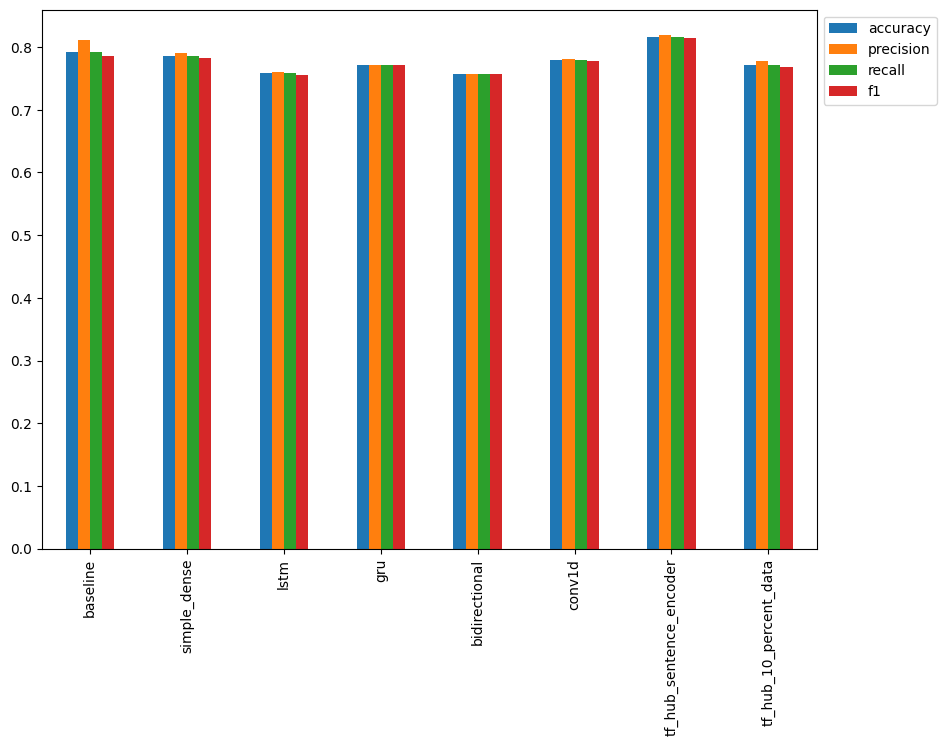

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Bize, verilerimizde kalıpların ne kadar öğrenilebilir olduğunun bir sınırı olabileceğini söylüyor.
Aynı veriler üzerinde birçok farklı model türü çok benzer performans gösteriyorsa, en yanlış tahminleri bulmak için en iyi modelimizi kullanacağız.

Önceden eğitilmiş USE TensorFlow Hub modellerimiz en iyi performansa sahip gibi görünüyor, eğitim verilerinin sadece %10'una sahip olanlar bile diğer modellerden daha iyi performans gösteriyor gibi görünüyor. Bu, transfer öğreniminin gücünü göstermeye gider.

Detaya inip her modelin F1-skorunu almaya ne dersiniz?

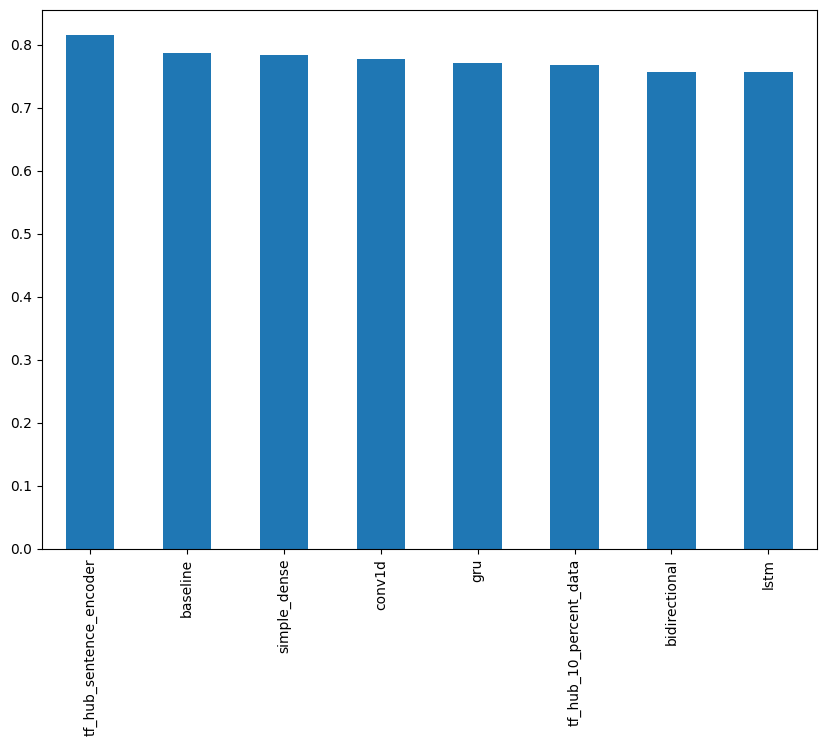

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

Tek bir ölçüme inerken, USE TensorFlow Hub modellerimizin diğer tüm modellerden daha iyi performans gösterdiğini görüyoruz. İlginç bir şekilde, temel çizginin F1 skoru, daha derin modellerin geri kalanından çok uzak değil.

Ayrıca TensorBoard.dev kullanarak modelimizin tüm eğitim günlüklerini görselleştirebiliriz.

In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "NLP modelling experiments" \
#   --description "A series of different NLP modellings experiments with various models" \
#   --one_shot # exits the uploader when upload has finished

Yürüttüğümüz farklı modelleme deneylerinin TensorBoard günlükleri burada görüntülenebilir: https://tensorboard.dev/experiment/LkoAakb7QIKBZ0RL97cXbw/

In [ ]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

# Modellerimizi birleştirmek (model birleştirme/istifleme)

Birçok üretim sistemi, bir tahmin yapmak için bir model topluluğu (birden fazla farklı model bir arada) kullanır.

Model istiflemenin arkasındaki fikir, eğer birkaç korelasyonsuz model bir tahminde hemfikirse, tahminin tekil bir model tarafından yapılan bir tahminden daha sağlam olması gerektiğidir.

Yukarıdaki cümledeki anahtar kelime korelasyonsuzdur, bu da farklı model türlerini söylemenin başka bir yoludur. Örneğin, bizim durumumuzda, temel çizgimizi, çift yönlü modelimizi ve TensorFlow Hub USE modelimizi birleştirebiliriz.

Bu modellerin hepsi aynı veriler üzerinde eğitilmiş olsa da, hepsinin kalıpları bulmanın farklı bir yolu vardır.

Üç LSTM modeli gibi benzer şekilde eğitilmiş üç model kullanacak olsaydık, çıktıkları tahminler muhtemelen çok benzer olacaktır.

Bunu arkadaşlarınızla nerede yemek yiyeceğinize karar vermeye çalışmak olarak düşünün. Hepiniz benzer zevklere sahipseniz, muhtemelen hepiniz aynı restoranı seçeceksiniz. Ama hepinizin farklı zevkleri varsa ve yine de aynı restoranı seçiyorsanız, restoran iyi olmalı.

Bir sınıflandırma sorunuyla çalıştığımız için, modellerimizi birleştirmenin birkaç yolu vardır:

1. Ortalama - Her örnek için her modelin çıktı tahmin olasılıklarını alın, birleştirin ve ardından ortalamasını alın.

2. Çoğunluk oyu (mod) - Tüm örneklerde modellerinizin her biriyle sınıf tahminleri yapın, tahmin edilen sınıf çoğunlukta olandır. Örneğin, üç farklı model sırasıyla [1, 0, 1] tahmin ederse, çoğunluk sınıfı 1'dir, bu nedenle bu tahmin edilen etiket olacaktır.

3. Model istifleme - Seçtiğiniz modellerin her birinin çıktılarını alın ve bunları başka bir modele girdi olarak kullanın.

📖 Kaynak: Model istifleme/birleştirme için yukarıdaki yöntemler Andriy Burkov tarafından Makine Öğrenimi Mühendisliği Kitabı'nın 6. Bölümünden uyarlanmıştır. Sadece bina modelleri değil, üretim ölçeğinde makine öğrenimi sistemleri için de makine öğrenimi mühendisliği alanına girmek istiyorsanız, bütünüyle okumanızı şiddetle tavsiye ederim. http://www.mlebook.com/wiki/doku.php

Yine, model istifleme kavramı en iyi eylemde görülür.

Temel modelimizi (model_0), LSTM modelimizi (model_2) ve her birinin birleşik tahmin olasılıklarının ortalamasını alarak tüm eğitim verileri (model_6) üzerinde eğitilmiş USE modelimizi birleştireceğiz.

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

Harika! Farklı sınıflardan oluşan birleşik bir tahmin dizimiz var, bunları gerçek etiketlere karşı değerlendirelim ve yığılmış modelimizin sonuçlarını all_model_results DataFrame'imize ekleyelim.

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.4776902887139,
 'precision': 0.7846473090649789,
 'recall': 0.7847769028871391,
 'f1': 0.7840495998394685}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

<ipython-input-110-eb0b96b5da6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100


In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790328,0.786089,0.783297
lstm,0.758530,0.760882,0.758530,0.755767
gru,0.771654,0.771412,0.771654,0.770882
bidirectional,0.757218,0.756784,0.757218,0.756621
conv1d,0.779528,0.781376,0.779528,0.777528
tf_hub_sentence_encoder,0.816273,0.818755,0.816273,0.814709
tf_hub_10_percent_data,0.771654,0.777164,0.771654,0.767956
ensemble_results,78.477690,0.784647,0.784777,0.784050


Yığılmış model diğer modellere karşı nasıl gitti?

🔑 Not: Modelimizin sonuçlarının çoğu benzer görünüyor. Bu, verilerimizden öğrenilebileceklerin bazı sınırlamaları olduğu anlamına gelebilir. Modelleme deneylerinizin çoğu benzer sonuçlar verdiğinde, verilerinizi tekrar ziyaret etmek iyi bir fikirdir, bunu kısa süre içinde yapacağız.

# Eğitimli bir modeli kaydetme ve yükleme

Eğitim süresi çok uzun sürmese de, eğitimli modellerinizi yeniden eğitmek zorunda kalmamak için kaydetmek iyi bir uygulamadır.

Modellerinizi kaydetmek, bir web uygulaması gibi dizüstü bilgisayarlarınızın dışında başka bir yerde kullanmak üzere dışa aktarmanıza da olanak tanır.

TensorFlow'da bir modeli kaydetmenin iki ana yolu vardır: https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#save_the_entire_model

1. HDF5 formatı.

2. SavedModel formatı (varsayılan).

İkisine de bir göz atalım.

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Bir modeli HDF5 olarak kaydederseniz, tekrar yüklerken, TensorFlow'a kullandığınız tüm özel nesneler hakkında bilgi vermeniz gerekir (örneğin, TensorFlow Hub bileşenleri gibi saf TensorFlow'dan oluşturulmayan bileşenler).

https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4301 - accuracy: 0.8163


[0.43009716272354126, 0.8162729740142822]

Hedef modelimizde save() yöntemini çağırmak ve bir dosya yolu geçirmek, modelimizi SavedModel biçiminde kaydetmemizi sağlar.

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

SavedModel biçimi (varsayılan) kullanıyorsanız, tensorflow.keras.models.load_model() işlevini kullanarak özel nesneler belirtmeden modelinizi yeniden yükleyebilirsiniz. https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4301 - accuracy: 0.8163


[0.43009716272354126, 0.8162729740142822]

Gördüğünüz gibi, modelimizi her iki formatla da kaydetmek ve yüklemek aynı performansla sonuçlanır.

🤔 Soru: SavedModel formatını mı yoksa HDF5 formatını mı kullanmalısınız?

Çoğu kullanım durumu için, SavedModel formatı yeterli olacaktır. Ancak, bu TensorFlow'a özgü bir standarttır. Daha genel amaçlı bir veri standardına ihtiyacınız varsa, HDF5 daha iyi olabilir. Daha fazlası için, modelleri kaydetme ve yükleme ile ilgili TensorFlow belgelerine göz atın. https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr

# Colab'tan dosya indirmek için:

from google.colab import files

files.download('example.txt')


*******************************

!wget (model uzantısını yaz, kurs materyallerinde var, USE feature extractor model)

!unzip (bu modelin adı: 08_model_6_USE_feature_extractor.zip)

yüklenen bu model ile aşağıdaki işlemleri yap.

# Önceden eğitilmiş modeli google deposundan indirme

model_6_pretrained = tf.keras.models.load_model("model ismi")

model_6_pretrained.evaluate(val_sentences, val_labels)

# Bu model ile tahminler yapma

model_6_pretrained_pred_probs = model_6_pretrained.predict (val_sentences)

model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))

model_6_pretrained [:10]

# En yanlış örnekleri bulmak

Daha önce, modelleme deneylerimizin çoğu, farklı türde modeller kullanmasına rağmen benzer sonuçlar veriyorsa, verilere geri dönmenin ve bunun neden olabileceğini incelemenin iyi bir fikir olduğundan bahsetmiştik.

Verilerinizi incelemenin en iyi yollarından biri, modelinizin tahminlerini sıralamak ve en çok yanlış aldığı örnekleri bulmaktır, yani hangi tahminlerin yüksek bir tahmin olasılığı vardı, ancak yanlış olduğu ortaya çıktı.

Bir kez daha, görselleştirme sizin arkadaşınızdır. Görselleştirin, görselleştirin, görselleştirin.

İşleri görsel hale getirmek için, en iyi performans gösteren modelimizin tahmin olasılıklarını ve sınıflarını doğrulama örnekleri (metin ve temel doğruluk etiketleri) ile birlikte alalım ve bunları bir panda DataFrame'de birleştirelim.

* En iyi modelimiz hala mükemmel değilse, hangi örnekler yanlış gidiyor?

* Hangileri en yanlış?

* Yanlış olan bazı etiketler var mı? Örn. model doğru anlıyor ama temel doğruluk etiketi bunu yansıtmıyor

Örneğin bir numunenin 0 etiketine sahip olması gerekirken modelin tahmin olasılığını 0.999 tahmin etmesi (neredeyse 1).

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.145544
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.734336
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.987350
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196619
4,Radiation emergency #preparedness starts with ...,1,1.0,0.730800


Yukarıdaki tabloda örnek olarak pred 1.0 iken pred_prob 0.747 olan en yanlış tahminlerden birisi. Çünkü hedef 0 ve pred_prob 1'e daha yakın.

Şimdi modelimizin yanlış tahminlerini bulalım (hedef nerede ! = pred) ve bunları tahmin olasılıklarına göre sıralayın (pred_prob sütunu).

model_6_pretrained_pred_probs.shape = (762,1) bu yüzden squeeze yaptık.

!= eşit değil demek.

In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.907538
759,FedEx will no longer transport bioterror patho...,0,1.0,0.860228
628,@noah_anyname That's where the concentration c...,0,1.0,0.850078
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.833751
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.833093
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.815615
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.807541
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.795798
144,The Sound of Arson,0,1.0,0.765922
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.765545


Son olarak, örnek metni, doğruluk etiketini, tahmin sınıfını ve tahmin olasılığını görselleştirmek için biraz kod yazabiliriz. Örneklerimizi tahmin olasılığına göre sıraladığımız için, örnekleri most_wrong DataFrame'imizin kafasından görüntülemek bize yanlış pozitifler gösterecektir.

Bir hatırlatma:

0 = Gerçek bir felaket Tweeti değil

1 = Gerçek felaket Tweeti

In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.907538115978241
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8602278232574463
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8500779867172241
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8337507247924805
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8330926895141602
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8156148791313171
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1, Prob: 0.8075411319

Yanlış negatifleri incelemek için most_wrong DataFrame'imizin alt ucunu görüntüleyebiliriz (model, 1, gerçek felaket Tweeti tahmin etmesi gerektiğinde gerçek bir diaster Tweeti değil, 0'ı tahmin eder).

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06137904152274132
Text:
Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...

----

Target: 1, Pred: 0, Prob: 0.060993850231170654
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.05816547945141792
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.05060379579663277
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05015338957309723
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.04708786681294441
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.037695325911045074
Te

Yukarıdaki bu çalışmayı uygulamak önemli çünkü yanlış etikete sahip örnekleri düzeltebilirsin. Veri setini geliştirmek için çalışmalar yapabilirsin.

# Test veri kümesinde tahminlerde bulunmak

Pekala, modelimizin doğrulama setinde nasıl performans gösterdiğini gördük.

Peki ya test veri kümesi?

Test veri kümesi için etiketlerimiz yok, bu yüzden bazı tahminlerde bulunmamız ve bunları kendimiz incelememiz gerekecek.

Test veri kümesinden rastgele örnekler hakkında tahminler yapmak için biraz kod yazalım ve bunları görselleştirelim.

In [ ]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 73ms/step
Pred: 0, Prob: 0.2030467987060547
Text:
@Sunnyclaribel. how many of @DPJHodges articles just attack labour or defend conservatives? see for yourself: http://t.co/shAAIjO2ZC

----

1/1 [==============================] - 0s 37ms/step
Pred: 1, Prob: 0.7198759317398071
Text:
Inspectors So Far Denied Access to Iran's Scientists - Wall Street Journal http://t.co/SuR3odwMKa http://t.co/2VSX1yO5hT

----

1/1 [==============================] - 0s 34ms/step
Pred: 1, Prob: 0.568817138671875
Text:
He is one of the three survivors of the destruction of Otsuka Village.

----

1/1 [==============================] - 0s 34ms/step
Pred: 0, Prob: 0.33246272802352905
Text:
I'm all for renewable energy but re: windfarms I do agree with Abbott - they are a horrible blight on the landscape https://t.co/UjYfRT77eJ

----

1/1 [==============================] - 0s 38ms/step
Pred: 1, Prob: 0.9635484218597412
Text:
@IrSolichin @9Tawan99 @178kakapo @POTUS The las

Modelimizin tahminleri test veri kümesinde nasıl görünüyor?

Modelinizin görünmeyen veriler üzerinde nasıl performans gösterdiğine ve ardından gerçek testte nasıl performans gösterebileceğine bir göz atmak için bu tür görselleştirme kontrollerini mümkün olduğunca sık yapmak önemlidir: Vahşi doğadan gelen tweetler.

# Vahşi doğadan gelen Tweetleri tahmin etmek

Bazı Tweetler bulmaya ve bir felaketle ilgili olup olmadıklarını tahmin etmek için modelimizi kullanmaya ne dersiniz?

Başlamak için, hayatı bir topluluk modeli gibi yaşamakla ilgili kendi Tweetlerimden birini alalım.

In [ ]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

Şimdi bir model ve örnek bir cümle almak ve bir tahmin döndürmek için küçük bir işlev yazacağız.

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=daniels_tweet)

1/1 [==============================] - 0s 35ms/step
Pred: 0.0 (not real disaster) Prob: 0.0415089912712574
Text:
Life like an ensemble: take the best choices from others and make your own


Modelimiz doğru tahmin etti. Tweetim bir felaketle ilgili değildi.

Gerçek felaketler hakkında birkaç Tweet bulmaya ne dersiniz?

2020 Beyrut patlamaları hakkında aşağıdaki iki Tweet gibi.

In [ ]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 35ms/step
Pred: 1.0 (real disaster) Prob: 0.965427041053772
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [ ]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 37ms/step
Pred: 1.0 (real disaster) Prob: 0.9724785685539246
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


Görünüşe göre modelimiz beklendiği gibi performans gösteriyor ve her iki diyaster Tweetini de gerçek diaster olarak tahmin ediyor.

🔑 Not: Yukarıdaki örnekler kiraz tarafından seçilmiştir ve bir modelin yüksek performansta çalışmasını beklediğiniz durumlardır. Gerçek üretim sistemleri için, modelinizin nasıl performans gösterdiğini görmek için sürekli olarak testler yapmak isteyeceksiniz.

# Denemeler

In [ ]:
# İstanbul Havalima'nında meydana gelen patlamada kimse yaralanmadı.
tweet_1 = "No one was injured in the explosion at Istanbul Airport."

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=tweet_1) # doğru

1/1 [==============================] - 0s 64ms/step
Pred: 1.0 (real disaster) Prob: 0.9802924990653992
Text:
No one was injured in the explosion at Istanbul Airport.


In [ ]:
# Beni öyle kızdırıyor ki kafasını kırmak istiyorum!
tweet_2 = "She makes me so angry I want to break her head!"

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=tweet_2) #yanlış

1/1 [==============================] - 0s 55ms/step
Pred: 0.0 (not real disaster) Prob: 0.031105518341064453
Text:
She makes me so angry I want to break her head!


In [ ]:
# Seni öyle ölesiye seviyorum ki içimde bombalar patlıyor.
tweet_3 = "I love you so much that bombs are exploding inside me."

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=tweet_3) # tartışılır :)

1/1 [==============================] - 0s 54ms/step
Pred: 0.0 (not real disaster) Prob: 0.06736401468515396
Text:
I love you so much that bombs are exploding inside me.


In [ ]:
# Metrobüslerde çıkan kavgada iki kişi yaralandı, şaka şaka :)
tweet_4 = "Two people were injured in the fight on the metrobuses, just kidding :)"

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=tweet_4) # yapay zeka şakadan anlar mı daha çok denemek lazım :)

1/1 [==============================] - 0s 58ms/step
Pred: 0.0 (not real disaster) Prob: 0.3674775958061218
Text:
Two people were injured in the fight on the metrobuses, just kidding :)


In [ ]:
# Türkçe deneme, acaba işe yarar mı?
tweet_5 = "Almanyada polis, masum Filistin göstericilerine ağır şiddet uyguladı"

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=tweet_5)
# model ingilizce cümleler ile eğitildiği için bilmemesi normal.

1/1 [==============================] - 0s 60ms/step
Pred: 0.0 (not real disaster) Prob: 0.3297664523124695
Text:
Almanyada polis, masum Filistin göstericilerine ağır şiddet uyguladı


# Hız/puan takası

Yapacağımız son testlerden biri, en iyi modelimiz ve temel modelimiz arasındaki hız/puan ödünlerini bulmaktır.

Bu neden önemli?

Deneme yoluyla bulduğunuz en iyi performans modelini seçmek cazip gelse de, bu model aslında bir üretim ortamında çalışmayabilir.

Şöyle düşünün, Twitter olduğunuzu ve saatte 1 milyon Tweet aldığınızı hayal edin (bu uydurma bir sayıdır, gerçek sayı çok daha yüksektir). Ve Tweetleri okumak ve yetkilileri gerçek zamanlıya yakın bir felaketle ilgili ayrıntılarla uyarmak için bir diaster algılama sistemi kurmaya çalışıyorsunuz.

Hesaplama gücü ücretsiz değildir, bu nedenle proje için tek bir bilgi işlem makinesiyle sınırlıdır. Bu makinede, modellerinizden biri %80 doğrulukla saniyede 10.000 tahmin yaparken, modellerinizden bir diğeri (daha büyük bir model) %85 doğrulukla saniyede 100 tahmin yapar.

Hangi modeli seçiyorsunuz?

İkinci modelin performans artışı ekstra kapasiteyi kaçırmaya değer mi?

Tabii ki, burada deneyebileceğiniz birçok seçenek var, örneğin ilk modele mümkün olduğunca çok Tweet göndermek ve ardından modelin en az emin olduğu modelleri ikinci modele göndermek gibi.

Buradaki nokta, deney yoluyla bulduğunuz en iyi modeli göstermektir, üretimde kullandığınız model olmayabilir.

Bunu daha somut hale getirmek için, bir model almak için bir işlev ve verilen modelin bu örnekler üzerinde tahminlerde bulunmanın ne kadar sürdüğünü bir dizi örnek ve süre yazalım.

In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

Şimdi en iyi performans gösteren modelimizin (model_6) ve temel modelimizin (model_0) tahmin zamanlarını değerlendirmek için pred_timer() işlevimizi kullanalım.

In [ ]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 8ms/step


(0.36145880999993096, 0.0004743553937006968)

In [ ]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.01805510199994842, 2.3694359579984803e-05)

Mevcut donanımımızla (benim durumumda, bir Google Colab dizüstü bilgisayar kullanıyorum) en iyi performans gösteren modelimiz, temel modelimiz olarak tahminlerde bulunmak için 10 kat daha fazla zaman alıyor.

Bu ekstra tahmin süresi buna değer mi?

Modelimizin F1 puanlarına karşı tahmin başına zamanı karşılaştıralım.

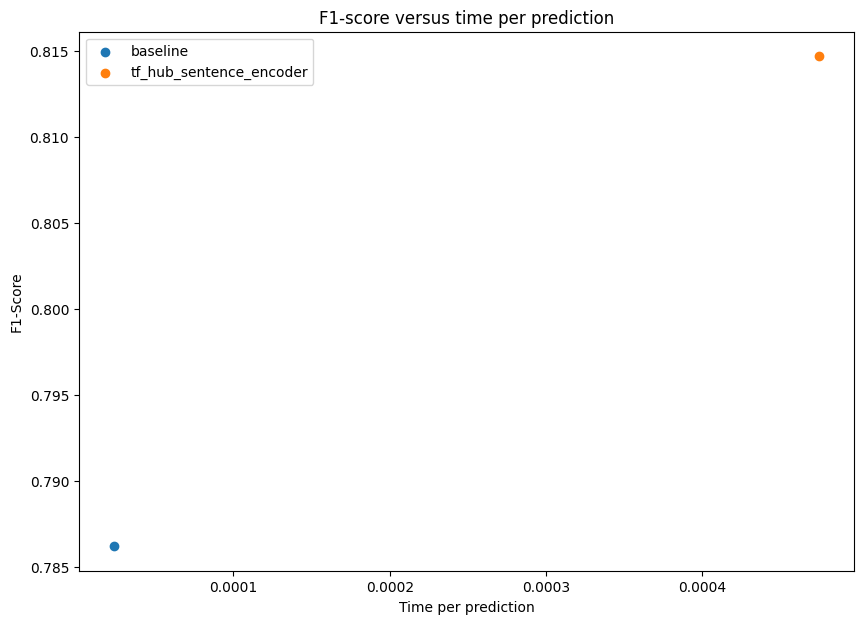

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

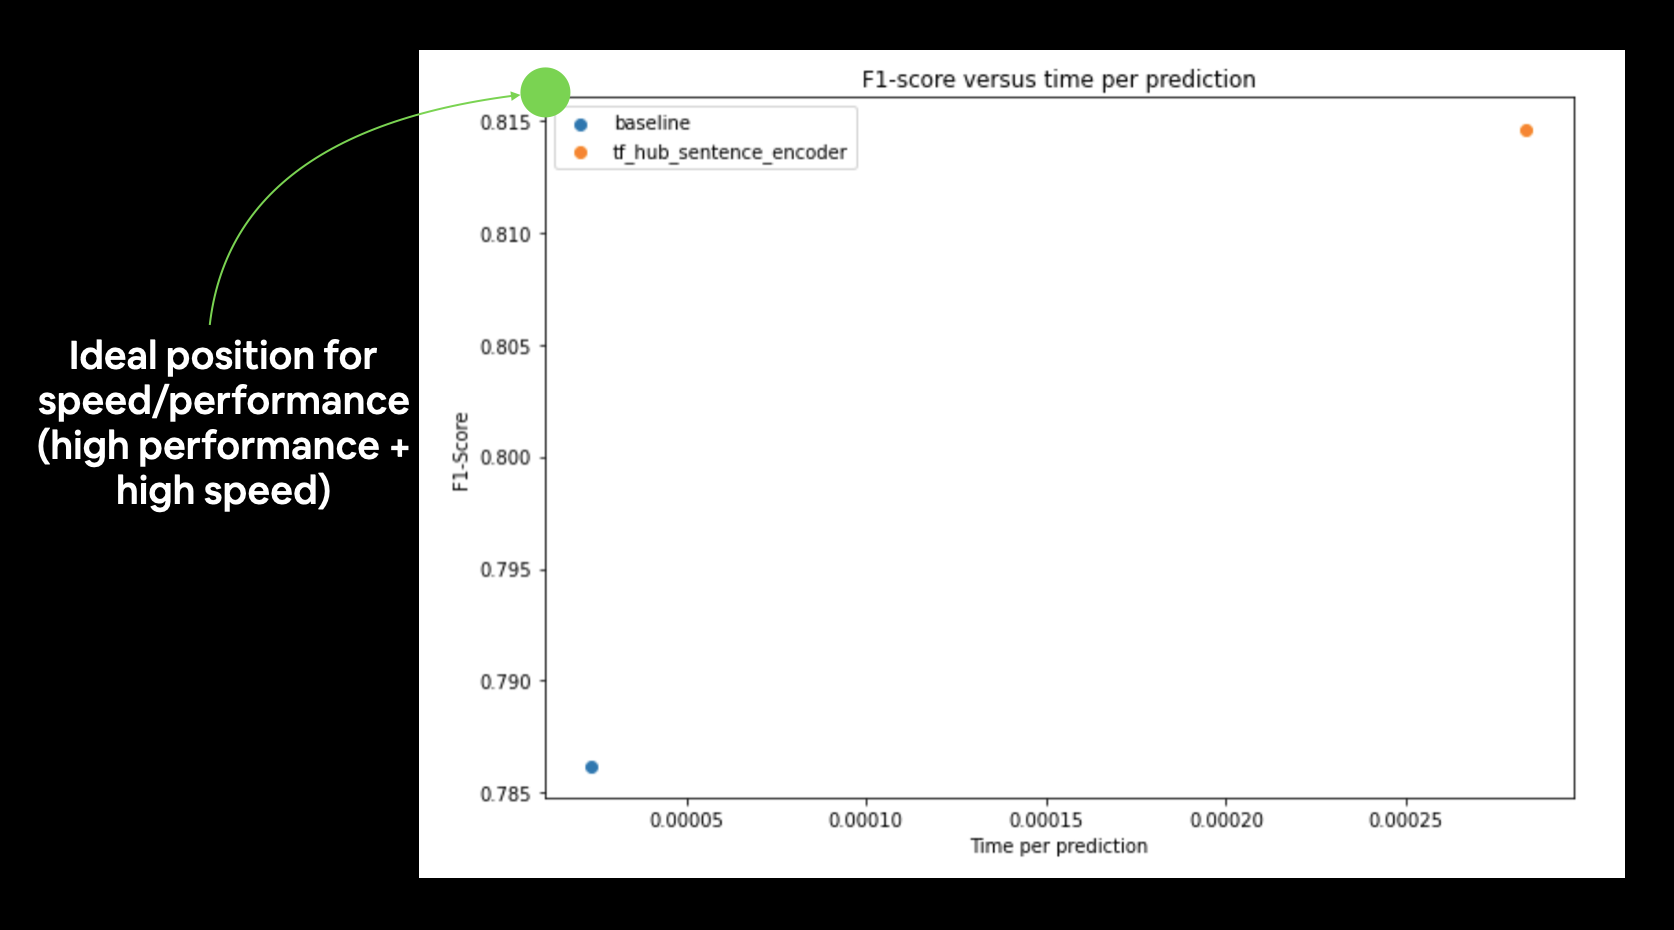

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-ideal-performance-speed-of-pred-tradeoff-highlighted.png"

# Resmi göster
display(Image(image_url))


Hız ve performans dengesi modeli için ideal konum (mükemmel sonuçlarla hızlı tahminler).

Tabii ki, bu noktaların her biri için ideal konum, arsanın sol üst köşesinde olmaktır (tahmin başına düşük zaman, yüksek F1 puanı).

Bizim durumumuzda, tahmin ve performans başına zaman için net bir denge var. En iyi performans gösteren modelimiz tahmin başına büyüklük sırası daha uzun sürer, ancak yalnızca birkaç F1 puan puanı artışıyla sonuçlanır.

Bu tür bir değiş tokuş, makine öğrenimi modellerini kendi uygulamalarınıza dahil ederken aklınızda bulundurmanız gereken bir şeydir.

# 🛠Alıştırmalar

1. İşlevsel API yerine Keras Sıralı API'yi kullanarak model_1, model_2 ve model_5'i yeniden oluşturun, derleyin ve eğitin. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

2. Eğitim verilerinin %10'u ile temel modeli yeniden eğitin. Eğitim verilerinin %10'una sahip Evrensel Cümle Kodlayıcı modeline kıyasla nasıl performans gösterir?

3. Keras katmanı olarak örneklerken training=True'u ayarlayarak TF Hub Evrensel Cümle Kodlayıcı modelini ince ayar yapmayı deneyin.

Bu kodlama katmanını text_vectorizer ve gömme katmanımız yerine kullanabiliriz

Sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",

Giriş_şekil=[],

Dtype=tf.string,

eğitilebilir=True) # TensorFlow Hub modelinde ince ayar yapmak için eğitimi açın

4. Tüm eğitim setinde şimdiye kadar sahip olduğunuz en iyi modeli yeniden eğitin (doğrulama bölünmesi yok). Ardından, test veri kümesinde tahminler yapmak ve tahminleri Kaggle'dan sample_submission.csv dosyasıyla aynı biçimde biçimlendirmek için bu eğitimli modeli kullanın (sample_submission.csv dosyasının neye benzediği için Colab'daki Dosyalar sekmesine bakın). Bunu yaptıktan sonra, Kaggle yarışmasına bir başvuru yapın, modeliniz nasıl performans gösterdi? https://www.kaggle.com/c/nlp-getting-started/data

5. Çoğunluk oyunu (mod) kullanarak topluluk tahminlerini birleştirin, bu, her modelin tahmin olasılıklarının ortalamasını almakla karşılaştırıldığında nasıl bir performans gösterir?

6. En iyi performans gösteren modelin doğrulama seti ve doğrulama zemini doğruluk etiketleri üzerindeki tahminleriyle bir karışıklık matrisi yapın.

# 📖 Müfredat dışı

Öğrendiklerinizi uygulamak için, aşağıdakilerden 3'üne bir saat harcamak (toplam 3 saat, isterseniz hepsini gözden geçirebilirsiniz) ve ardından öğrendikleriniz hakkında bir blog yazısı yazmak iyi bir fikir olacaktır.

* NLP içindeki farklı sorunlara ve bunların nasıl çözüleceğine genel bir bakış için şunu okuyun:

* Doğal Dil İşlemeye Basit Bir Giriş https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

* NLP problemlerinin %90'ı nasıl çözülür: adım adım kılavuz https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e

* MIT'nin Tekrarlayan Sinir Ağları dersini gözden geçirin. Bu, inşa etmekte olduğunuz RNN modelinin arkasında olup bitenlere yapılan en büyük eklemelerden biri olacak. https://www.youtube.com/watch?v=SEnXr6v2ifU

* TensorFlow web sitesindeki kelime gömme sayfasını okuyun. Gömmeler NLP'nin çok büyük bir parçasıdır. Onları bu defter boyunca ele aldık ama ekstra alıştırma buna değer. Kılavuzdaki tüm kodu yeni bir not defterine yazmak iyi bir alıştırma olacaktır. https://www.tensorflow.org/text/guide/word_embeddings?hl=tr

* TensorFlow'daki RNN'ler hakkında daha fazla bilgi için TensorFlow RNN kılavuzunu okuyun ve çoğaltın. Bu kılavuzdaki birçok kavramı ele aldık, ancak kodu kendiniz için tekrar yazmaya değer. https://www.tensorflow.org/guide/keras/working_with_rnns

* Metin verileri her zaman indirdiğimiz veriler gibi güzel bir pakette gelmez. Bu nedenle, TensorFlow derin öğrenme modellerinizle birlikte olmak için farklı metin kaynakları hazırlama konusunda daha fazla şey peşindeyseniz, aşağıdakileri kontrol etmeye değer:

* TensorFlow metin yükleme öğreticisi. https://www.tensorflow.org/tutorials/load_data/text?hl=tr

* Real Python tarafından Python ile metin dosyalarını okumak. https://realpython.com/read-write-files-python/

* Bu not defteri NLP kodu yazmaya odaklandı. Derin Öğrenme ile NLP'nin nasıl gerçekleştiğine dair matematiksel olarak zengin bir genel bakış için, Standford'un Derin Öğrenme ile Doğal Dil İşleme ders notları Bölüm 1'i okuyun. https://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf

  * Daha da derin bir dalış için, tüm CS224n (Derin Öğrenme ile Doğal Dil İşleme) kursunu bile yapabilirsiniz.

* Okumak için harika blog gönderileri:

  * Andrei Karpathy'nin RNN'lerin Mantıksız Etkinliği, RNN'lerle Shakespeare metni oluşturmaya dalıyor. https://karpathy.github.io/2015/05/21/rnn-effectiveness/

  * NLP ile Metin Sınıflandırması: Mauro Di Pietro tarafından Tf-Idf vs Word2Vec vs BERT. Metni sayılara dönüştürmek ve ardından sınıflandırmak için farklı tekniklere genel bir bakış. https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

  * Kelime gömme nedir? Makine Öğrenimi Ustalığı tarafından. https://machinelearningmastery.com/what-are-word-embeddings/

* İnlemeye değer diğer konular:

  * Dikkat mekanizmaları. Bunlar, transformatör mimarisinin temel bir bileşenidir ve ayrıca genellikle derin NLP modellerine iyileştirmeler ekler. https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/

  * Transformatör mimarileri. Bu model mimarisi son zamanlarda NLP dünyasını kasıp kavurdu ve birçok ölçütte en son teknolojiye ulaştı. Bununla birlikte, yerden kalkmak için biraz daha fazla işlem gerekiyor, HuggingFace Modelleri (eski adıyla HuggingFace Transformers) kitaplığı muhtemelen en iyi hızlı başlangıcınızdır.

    * Ve şimdi HuggingFace'in kütüphanelerinin nasıl çalıştığına dair kendi kursu bile var! Ben yapmadım ama HuggingFace'in yaptığı her şey birinci sınıf.

    * http://jalammar.github.io/illustrated-transformer/
    * https://huggingface.co/models
    * https://huggingface.co/learn/nlp-course/chapter1/1

📖 Kaynak: GitHub'daki tüm kurs materyallerine bakın: https://github.com/mrdbourke/tensorflow-deep-learning